In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

I started by importing the essential Python libraries for data analysis and visualization.  
- **Pandas** and **NumPy** will help me handle and process the dataset efficiently.  
- For visual exploration, I included **Matplotlib** and **Seaborn**, which give me flexibility in creating clear and insightful plots.  
- I also suppressed warnings to keep my notebook output clean.  
- Finally, I set Pandas to display up to 100 columns, so I don’t miss any details while exploring the dataset.  


In [2]:
sheet_id = "1cew2eJA_0YRwYC5BOZdSl8fhTY0hSOVtD0xRfhevlgI"
sheet_name = "kidney_disease"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

To load my dataset directly from Google Sheets into Python,  
I used the **sheet ID** and **sheet name** to generate a CSV export link.  

- `sheet_id` is the unique identifier of the Google Sheet.  
- `sheet_name` specifies which tab (worksheet) inside the sheet I want.  
- Using an f-string, I created a URL that allows me to fetch the sheet as a CSV file.  

This way, I can directly read the data into Pandas without manually downloading the file.  


In [3]:
df = pd.read_csv(url,index_col=0)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


I loaded the dataset into a Pandas DataFrame using the generated URL.  
- By passing `index_col=0`, I set the first column as the index of the DataFrame.  
- Then, I used `df.head()` to preview the first 5 rows and confirm that the data was loaded correctly.  

In [4]:
df.shape

(400, 25)

To check the dimensions of my dataset, I used `df.shape`.  

- The output `(400, 25)` means my dataset contains **400 rows** and **25 columns**.  
- This gives me a quick idea of the dataset size before moving into deeper analysis.  

In [5]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,261,364,317,323,339,250
mean,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I used `df.describe(include='all')` to get an overview of my dataset.  

- For **numerical columns** (e.g., `age`, `bp`, `sg`, `bgr`, `hemo`), it shows:
  - `count`: number of non-missing values  
  - `mean`, `std`: average and spread of values  
  - `min`, `25%`, `50%`, `75%`, `max`: range and distribution  

- For **categorical columns** (e.g., `rbc`, `pc`, `htn`, `dm`, `classification`), it shows:
  - `count`: number of non-missing values  
  - `unique`: how many distinct categories exist  
  - `top`: the most frequent category  
  - `freq`: how many times the top category appears  

From this summary:  
- The dataset has a mix of **numeric** and **categorical** features.  
- Some columns have **missing values** (since counts vary across columns).  
- Example:  
  - `age` ranges from 2 to 90 with an average of ~51.  
  - `bp` (blood pressure) ranges from 50 to 180.  
  - `classification` (target variable) has two classes (`ckd` and `notckd`), with `ckd` being more frequent.  


In [6]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
# Renaming columns for better readability

df.columns = [ 'age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cell','platelet_count',
            'prothrombin_complex_concentrate','basophils','blood_glucose_random','blood_urea','serum_creatinine',
            'sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell','red_cell_count','hypertension',
            'diabetes_mellitus','coronary_artery_disease','appetite','pulmonary_edema','anemia','classification']

For better readability and alignment with medical terminology,  
I renamed the dataset columns as follows:

- `bp` → `blood_pressure`  
- `sg` → `specific_gravity`  
- `al` → `albumin`  
- `su` → `sugar`  
- `rbc` → `red_blood_cell`  
- `pc` → `platelet_count`  
- `pcc` → `prothrombin_complex_concentrate`  
- `ba` → `basophils`  
- `bgr` → `blood_glucose_random`  
- `bu` → `blood_urea`  
- `sc` → `serum_creatinine`  
- `sod` → `sodium`  
- `pot` → `potassium`  
- `hemo` → `hemoglobin`  
- `pcv` → `packed_cell_volume`  
- `wc` → `white_blood_cell`  
- `rc` → `red_cell_count`  
- `htn` → `hypertension`  
- `dm` → `diabetes_mellitus`  
- `cad` → `coronary_artery_disease`  
- `appet` → `appetite`  
- `pe` → `pulmonary_edema`  
- `ane` → `anemia`  
- `classification` → remains as the **target variable**  


In [8]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
# Checking for duplicates
df.duplicated().sum()

# I checked for duplicate rows in the dataset using `df.duplicated().sum()` and found **0 duplicates**.  

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              391 non-null    float64
 1   blood_pressure                   388 non-null    float64
 2   specific_gravity                 353 non-null    float64
 3   albumin                          354 non-null    float64
 4   sugar                            351 non-null    float64
 5   red_blood_cell                   248 non-null    object 
 6   platelet_count                   335 non-null    object 
 7   prothrombin_complex_concentrate  396 non-null    object 
 8   basophils                        396 non-null    object 
 9   blood_glucose_random             356 non-null    float64
 10  blood_urea                       381 non-null    float64
 11  serum_creatinine                 383 non-null    float64
 12  sodium                     

I used `df.info()` to check the dataset structure:  

- The dataset has **400 rows** and **25 columns**.  
- Out of 25 columns:  
  - **14 are numerical** (`float64`)  
  - **11 are categorical** (`object`)  
- Several columns have **missing values** (e.g., `red_blood_cell`, `sodium`, `potassium`).  
- The target column `classification` is **complete** with 400 non-null entries.  
- Memory usage is approximately **81.2 KB**.  


In [11]:
# Chking for null values
df.isna().sum()

age                                  9
blood_pressure                      12
specific_gravity                    47
albumin                             46
sugar                               49
red_blood_cell                     152
platelet_count                      65
prothrombin_complex_concentrate      4
basophils                            4
blood_glucose_random                44
blood_urea                          19
serum_creatinine                    17
sodium                              87
potassium                           88
hemoglobin                          52
packed_cell_volume                  71
white_blood_cell                   106
red_cell_count                     131
hypertension                         2
diabetes_mellitus                    2
coronary_artery_disease              2
appetite                             1
pulmonary_edema                      1
anemia                               1
classification                       0
dtype: int64

✅ **No missing values in target column (`classification`).**  
⚠️ **Most missing values are in medical test results:**  
- `red_blood_cell` → **152** missing  
- `red_cell_count` → **131** missing  
- `white_blood_cell` → **106** missing  
- `potassium` → **88** missing  
- `sodium` → **87** missing  

In [12]:
cat_col = df.select_dtypes(include='object').drop('classification',axis=1)
num_col = df.select_dtypes(include=['int64','float64'])
y = df['classification']

I separated my dataset into three parts:  
- **cat_col** → all categorical features (excluding the target `classification`).  
- **num_col** → all numerical features (`int64`, `float64`).  
- **y** → the target variable (`classification`).  

This separation makes it easier to apply different preprocessing steps for numerical and categorical columns.  


In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

num_col = pd.DataFrame(imputer.fit_transform(num_col),columns=imputer.get_feature_names_out())
num_col.isna().sum()

age                     0
blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hemoglobin              0
packed_cell_volume      0
white_blood_cell        0
red_cell_count          0
dtype: int64

I applied **KNN Imputer** on the numerical columns to handle missing values.  
- Used `n_neighbors=5`, meaning each missing value is replaced by the average of its 5 nearest neighbors.  
- After imputation, I converted the result back into a DataFrame with the same column names.  
- Checking for missing values shows that all numerical columns now have **0 nulls**. ✅  

**Why I am doing this:**
- The dataset contains several missing values in important medical test results (e.g., `sodium`, `potassium`, `hemoglobin`).  
- Instead of dropping rows/columns or using simple mean/median imputation, I chose **KNN Imputer** because:  
  - It considers similarity between patients when filling missing values.  
  - This leads to more realistic and accurate imputations in a medical dataset.  
  - It preserves the underlying data patterns, which is important for building reliable ML models.  


In [14]:
cat_col.isna().sum()

red_blood_cell                     152
platelet_count                      65
prothrombin_complex_concentrate      4
basophils                            4
hypertension                         2
diabetes_mellitus                    2
coronary_artery_disease              2
appetite                             1
pulmonary_edema                      1
anemia                               1
dtype: int64

In [15]:
for i in ['red_blood_cell','platelet_count']:
    cat_col[i].fillna('unknown',inplace=True)

For categorical columns with a large number of missing values (`red_blood_cell`, `platelet_count`),  
I replaced the missing values with the label **"unknown"**.  

- This preserves all rows without dropping data.  
- It also allows the model to learn if missingness itself carries medical significance.  

In [16]:
cat_col.isna().sum()

red_blood_cell                     0
platelet_count                     0
prothrombin_complex_concentrate    4
basophils                          4
hypertension                       2
diabetes_mellitus                  2
coronary_artery_disease            2
appetite                           1
pulmonary_edema                    1
anemia                             1
dtype: int64

In [17]:
for i in cat_col.columns:
    cat_col[i].fillna(cat_col[i].mode()[0], inplace=True)

For the remaining categorical columns with small amounts of missing data,  
I filled missing values with the **most frequent category (mode)**.  

- This ensures there are **no null values** left in categorical features.  
- Combined with the previous step (`'unknown'` for high-missing columns), the dataset is now fully complete.  

In [18]:
cat_col.isna().sum()

red_blood_cell                     0
platelet_count                     0
prothrombin_complex_concentrate    0
basophils                          0
hypertension                       0
diabetes_mellitus                  0
coronary_artery_disease            0
appetite                           0
pulmonary_edema                    0
anemia                             0
dtype: int64

In [19]:
df = pd.concat([num_col,cat_col,y],axis=1)
df.isna().sum()

age                                0
blood_pressure                     0
specific_gravity                   0
albumin                            0
sugar                              0
blood_glucose_random               0
blood_urea                         0
serum_creatinine                   0
sodium                             0
potassium                          0
hemoglobin                         0
packed_cell_volume                 0
white_blood_cell                   0
red_cell_count                     0
red_blood_cell                     0
platelet_count                     0
prothrombin_complex_concentrate    0
basophils                          0
hypertension                       0
diabetes_mellitus                  0
coronary_artery_disease            0
appetite                           0
pulmonary_edema                    0
anemia                             0
classification                     0
dtype: int64

I combined the cleaned numerical (`num_col`) and categorical (`cat_col`) features with the target variable (`y`)  
using `pd.concat(axis=1)`.  

- After recombining, I checked for missing values with `df.isna().sum()`.  
- The output shows **0 missing values** across all columns, meaning the dataset is now fully complete and ready for further preprocessing or modeling.  

In [20]:
df.age = df.age.astype('int64')
# I converted the `age` column from float to integer using `df.age = df.age.astype('int64')` for consistency and easier interpretation.

In [21]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia,classification
0,48,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,15.4,44.0,7800.0,5.20,unknown,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7,50.0,1.020,4.0,0.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96,unknown,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [22]:
for i in cat_col.columns:
    print(df[i].value_counts())
    print(50*'-')
    

red_blood_cell
normal      201
unknown     152
abnormal     47
Name: count, dtype: int64
--------------------------------------------------
platelet_count
normal      259
abnormal     76
unknown      65
Name: count, dtype: int64
--------------------------------------------------
prothrombin_complex_concentrate
notpresent    358
present        42
Name: count, dtype: int64
--------------------------------------------------
basophils
notpresent    378
present        22
Name: count, dtype: int64
--------------------------------------------------
hypertension
no     253
yes    147
Name: count, dtype: int64
--------------------------------------------------
diabetes_mellitus
no     263
yes    137
Name: count, dtype: int64
--------------------------------------------------
coronary_artery_disease
no     366
yes     34
Name: count, dtype: int64
--------------------------------------------------
appetite
good    318
poor     82
Name: count, dtype: int64
-----------------------------------------

In [23]:
df.describe(include='all')

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia,classification
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400,400,400,400,400,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201,259,358,378,253,263,366,318,324,340,250
mean,51.30750,76.315000,1.017170,1.055000,0.464500,149.280500,57.513500,3.067925,137.526250,4.57075,12.562750,38.933500,8466.950000,4.695250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.09396,13.571708,0.005481,1.287057,1.049998,76.522105,49.616097,5.633626,9.282543,2.82704,2.765454,8.392375,2590.669338,0.898295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.00000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.50000,3.100000,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.00000,70.000000,1.013000,0.000000,0.000000,100.150000,27.000000,0.900000,135.000000,3.90000,10.775000,33.000000,6900.000000,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,54.00000,80.000000,1.016000,0.300000,0.000000,122.000000,44.000000,1.310000,138.000000,4.39000,12.780000,40.100000,8380.000000,4.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.00000,80.000000,1.020000,2.000000,0.000000,171.000000,66.000000,2.800000,141.000000,4.90000,14.800000,45.000000,9600.000000,5.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Although the dataset already has a blood glucose measurement (`blood_glucose_random`),  
the `sugar` column specifically refers to **urine glucose levels**, based on references from medical platforms.  
- This distinction is important because urine glucose can indicate **renal threshold issues** or **early kidney dysfunction**, which might not always show in blood glucose.


In [24]:
my_col = ["#264653",  
        "#2A9D8F",  
        "#E9C46A",  
        "#F4A261", 
        "#E76F51"] 

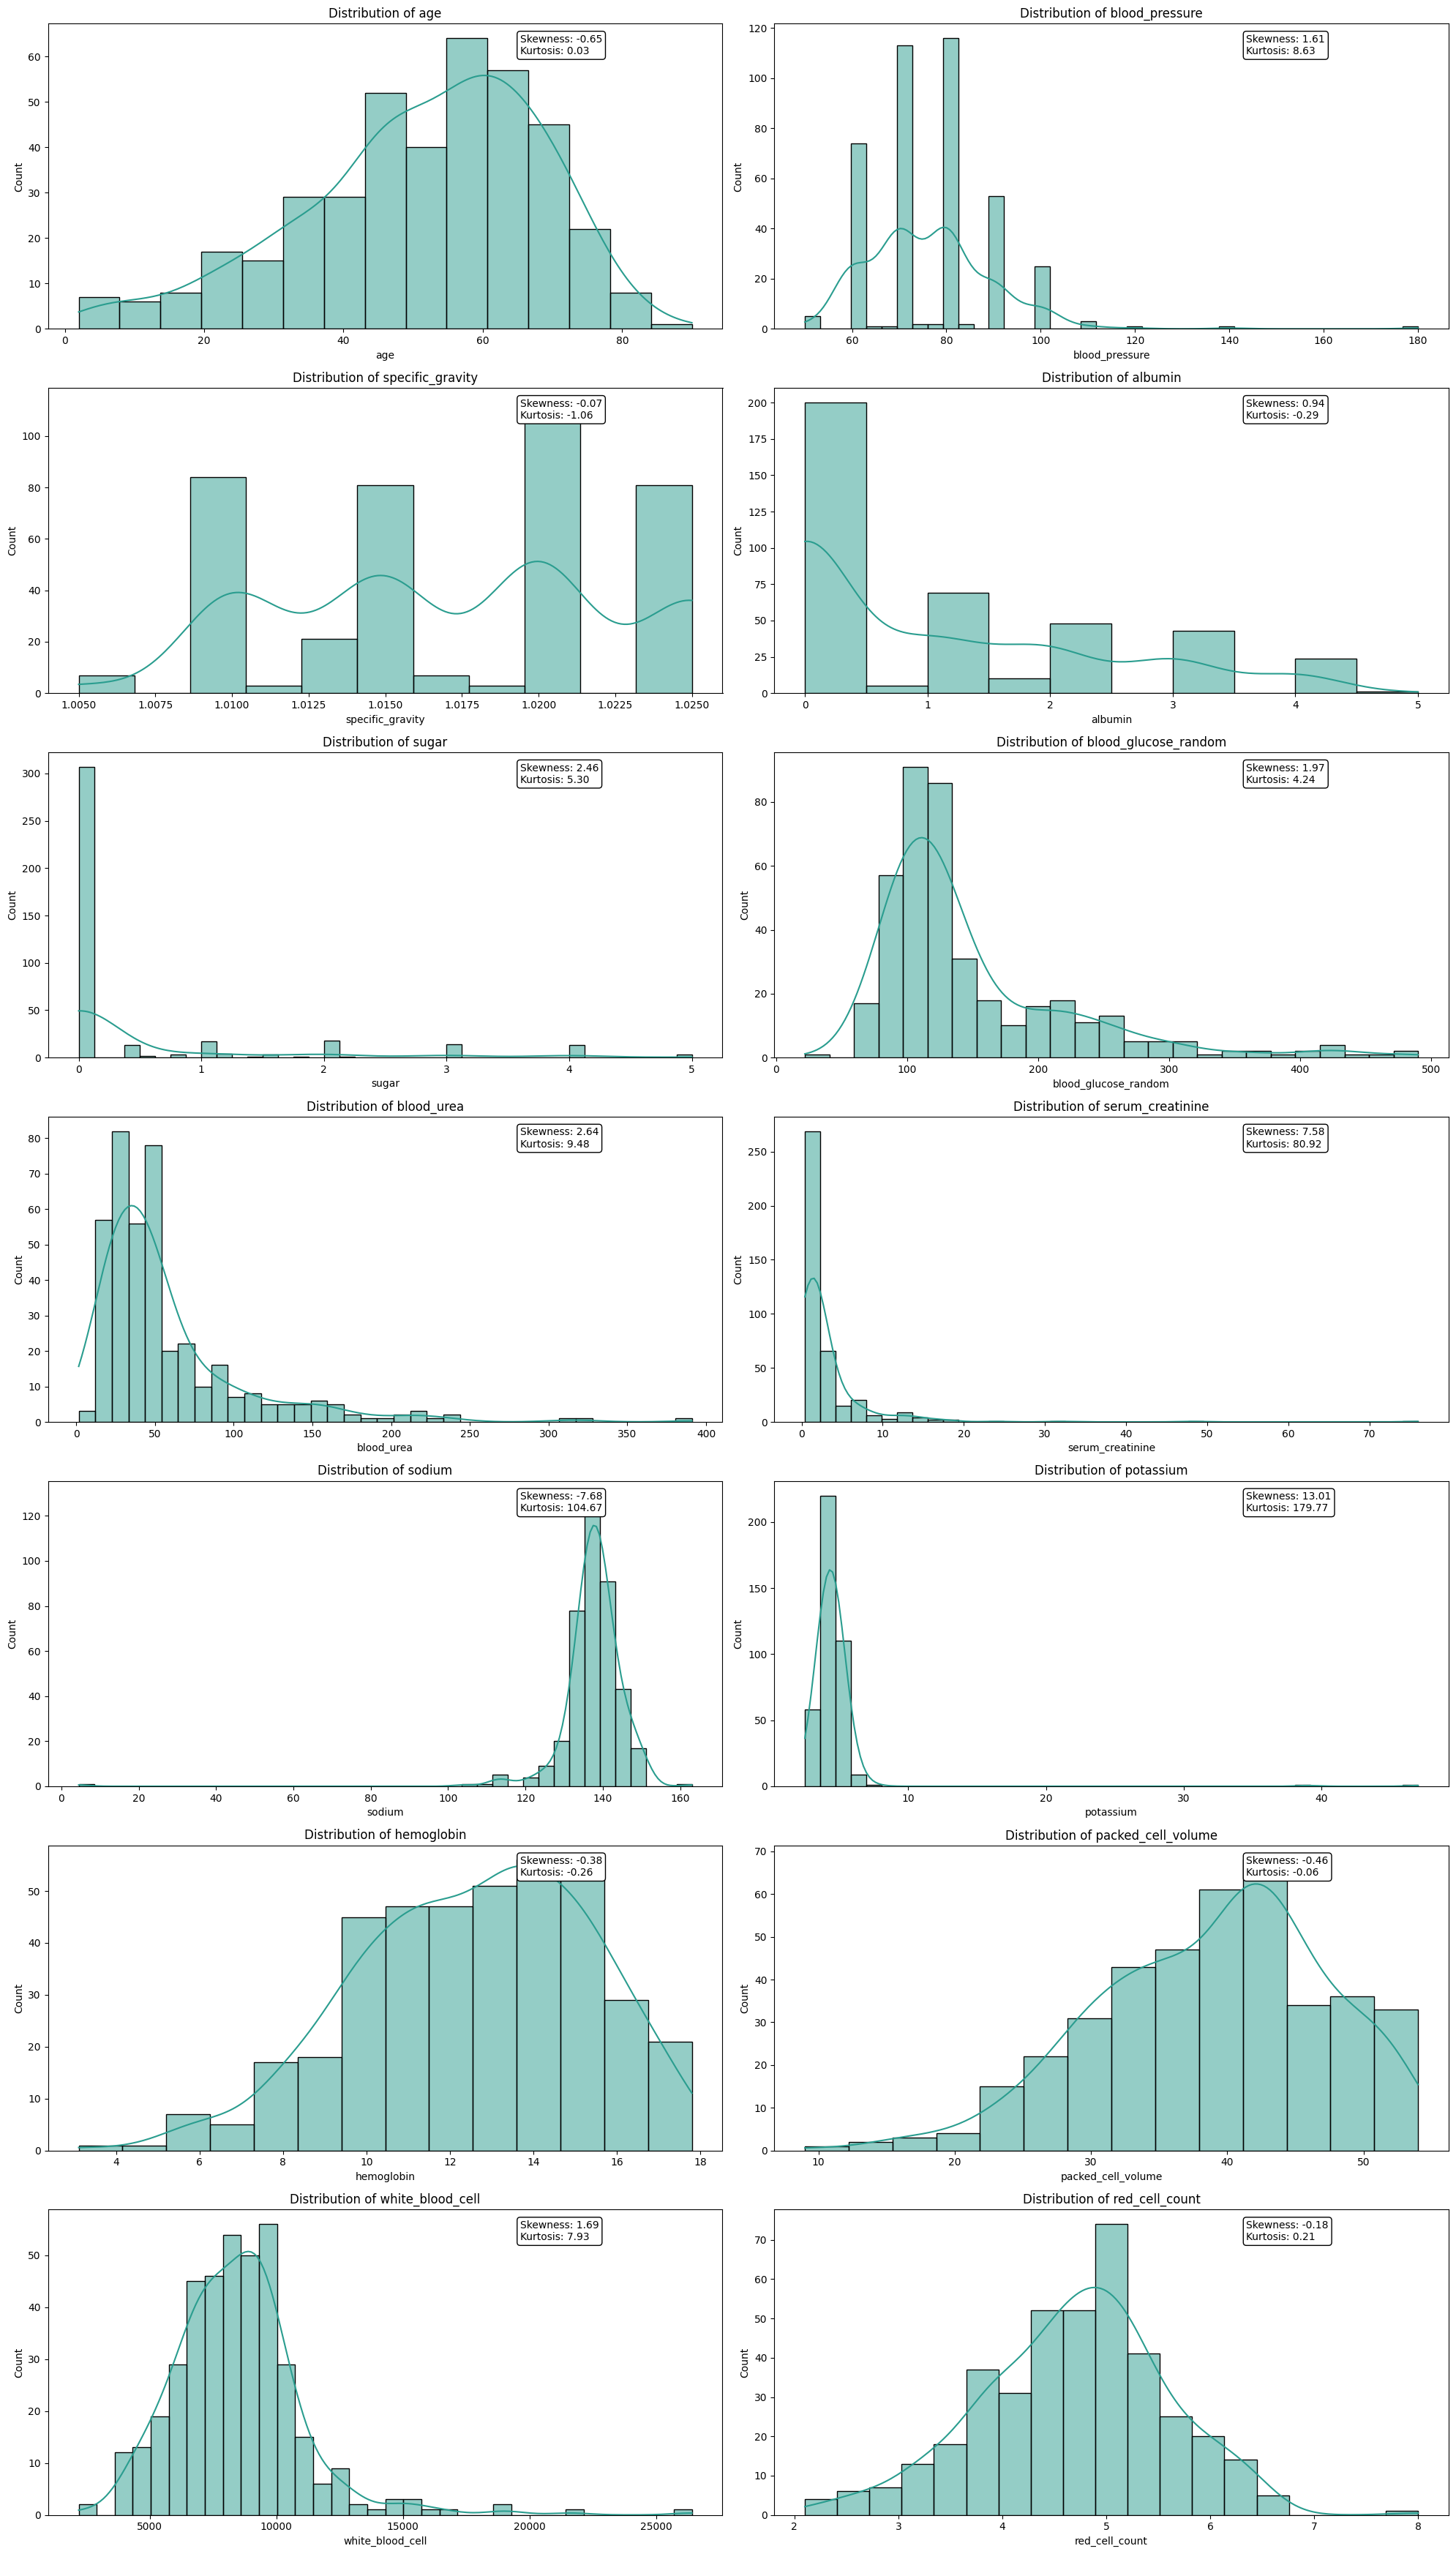

In [25]:
from scipy.stats import skew, kurtosis

n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.histplot(df[col], kde=True, ax=ax[i],color="#2A9D8F",)
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    ax[i].text(0.7, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=ax[i].transAxes,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))
    ax[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

### Distribution Analysis of Numerical Features

I plotted **histograms with KDE (Kernel Density Estimate)** for each numerical feature to visualize their distributions.  

- Used `skew()` to measure **asymmetry** of the distribution:  
  - Positive skew → long right tail  
  - Negative skew → long left tail  
- Used `kurtosis()` to measure **tailedness** of the distribution:  
  - High kurtosis → heavy tails / outliers  
  - Low kurtosis → light tails / flatter distribution  

- Each subplot shows:
  - The histogram of values
  - KDE curve for smoother visualization
  - Skewness and kurtosis values as annotations

This helps to identify **non-normal features, outliers, and the need for transformation** before modeling.  


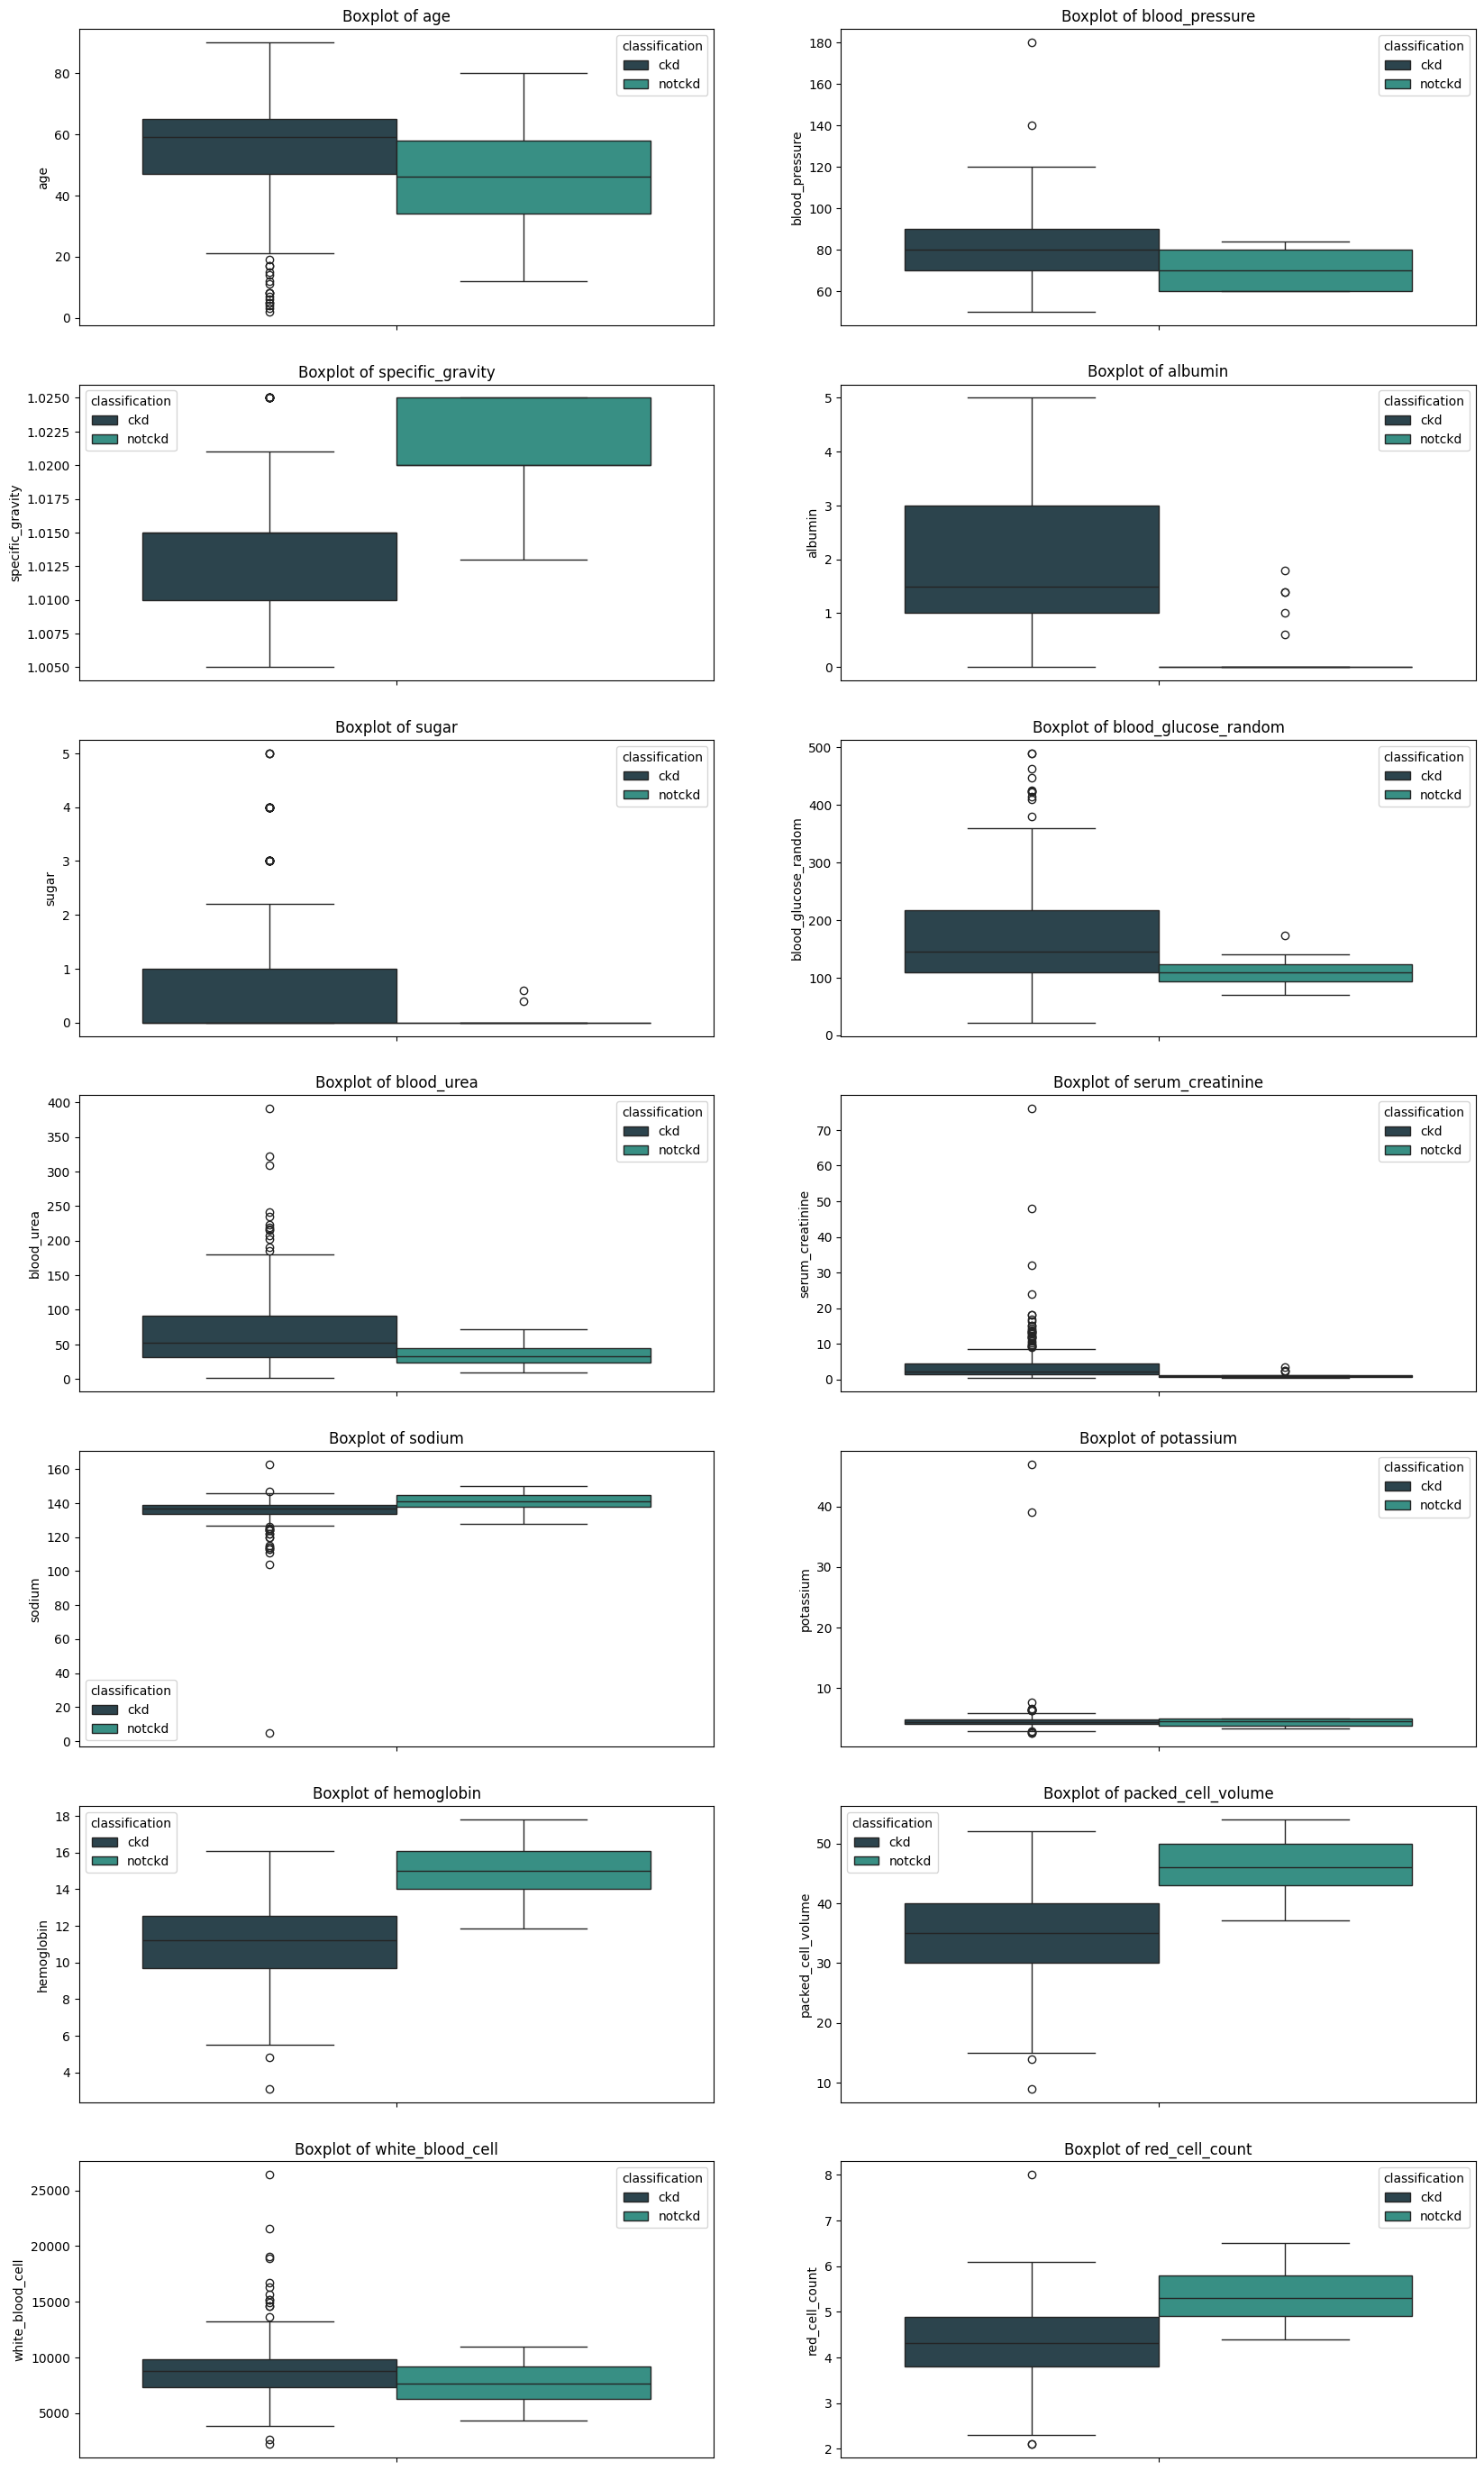

In [26]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.boxplot(data=df,y=df[col], ax=ax[i],hue='classification',palette=my_col)
    ax[i].set_title(f'Boxplot of {col}')

### Boxplot Analysis of Numerical Features by CKD Classification

I plotted **boxplots** for each numerical feature, separated by the target variable `classification` (`ckd` vs `notckd`).  

- Each boxplot shows:
  - Median, quartiles, and outliers for the feature
  - Differences in distributions between CKD and non-CKD patients
- Using the `hue='classification'` parameter allows direct **comparison between classes**
- The color palette (`my_col`) helps differentiate the classes visually

This analysis helps to:
- Identify **outliers** in numerical features
- Compare **feature distributions across CKD and non-CKD**
- Highlight features with **distinct separation**, which are likely important for predictive modeling


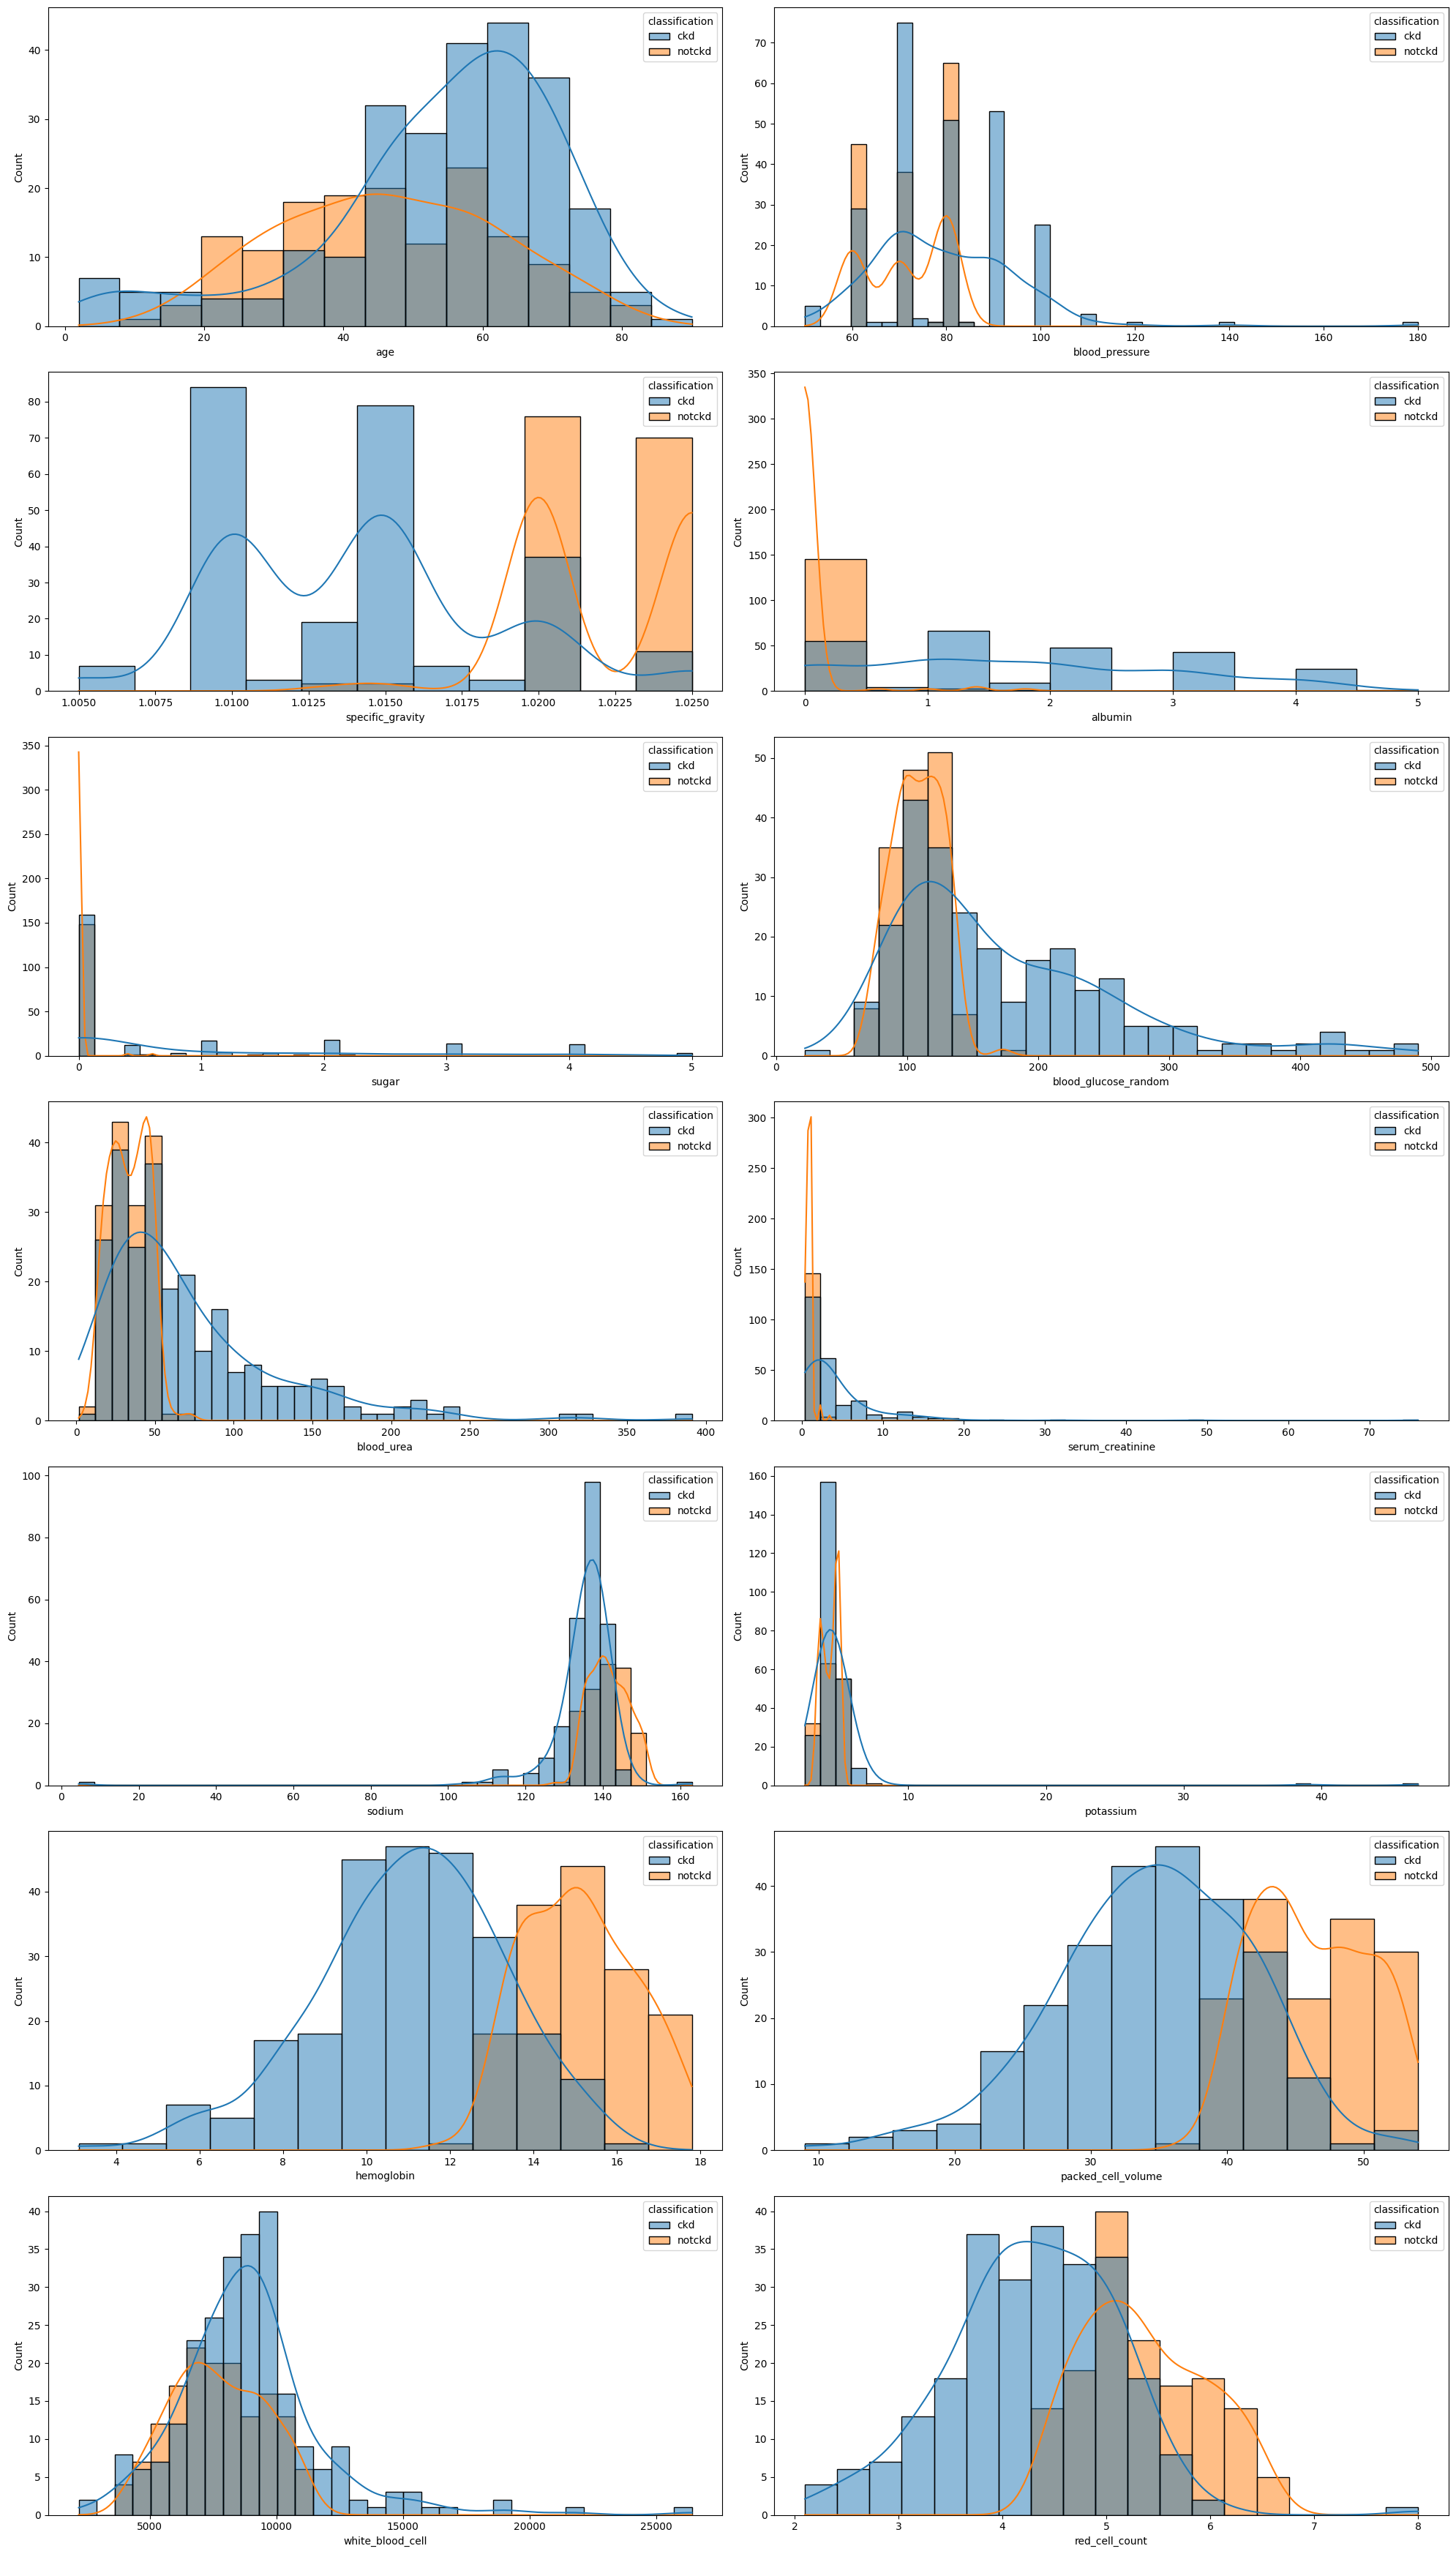

In [27]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.histplot(data=df,x=df[col], kde=True, ax=ax[i],color="#2A9D8F",hue = 'classification')
    
    
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import ttest_ind
RL = []

for i in num_col.columns:
    print(25*'-',i,25*'-')
    # Class A and B scores
    class_a = df[df['classification'] == 'ckd'][i].to_list()
    class_b = df[df['classification'] == 'notckd'][i].to_list()

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b)

    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: The class averages are significantly different.")
        RL.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    
    print(50*'*')
    print(' ')

print(RL)

------------------------- age -------------------------
t-statistic: 4.3487
p-value: 0.000017
Reject the null hypothesis: The class averages are significantly different.
**************************************************
 
------------------------- blood_pressure -------------------------
t-statistic: 5.7526
p-value: 0.000000
Reject the null hypothesis: The class averages are significantly different.
**************************************************
 
------------------------- specific_gravity -------------------------
t-statistic: -20.0527
p-value: 0.000000
Reject the null hypothesis: The class averages are significantly different.
**************************************************
 
------------------------- albumin -------------------------
t-statistic: 15.3908
p-value: 0.000000
Reject the null hypothesis: The class averages are significantly different.
**************************************************
 
------------------------- sugar -------------------------
t-statistic: 7.1689

#### Two-Sample t-Test Between CKD and Non-CKD Patients

I performed a **two-sample t-test** for each numerical feature to check if the mean values significantly differ between `ckd` and `notckd` patients.  

- **Null hypothesis (H0):** The class means are equal.  
- **Alternative hypothesis (H1):** The class means are different.  
- Significance level: `alpha = 0.05`.  

#### Interpretation:
- Most numerical features show **statistically significant differences** between CKD and non-CKD patients, suggesting they are important for classification.  
- `potassium` did not show a significant difference and may be less informative for predicting CKD.


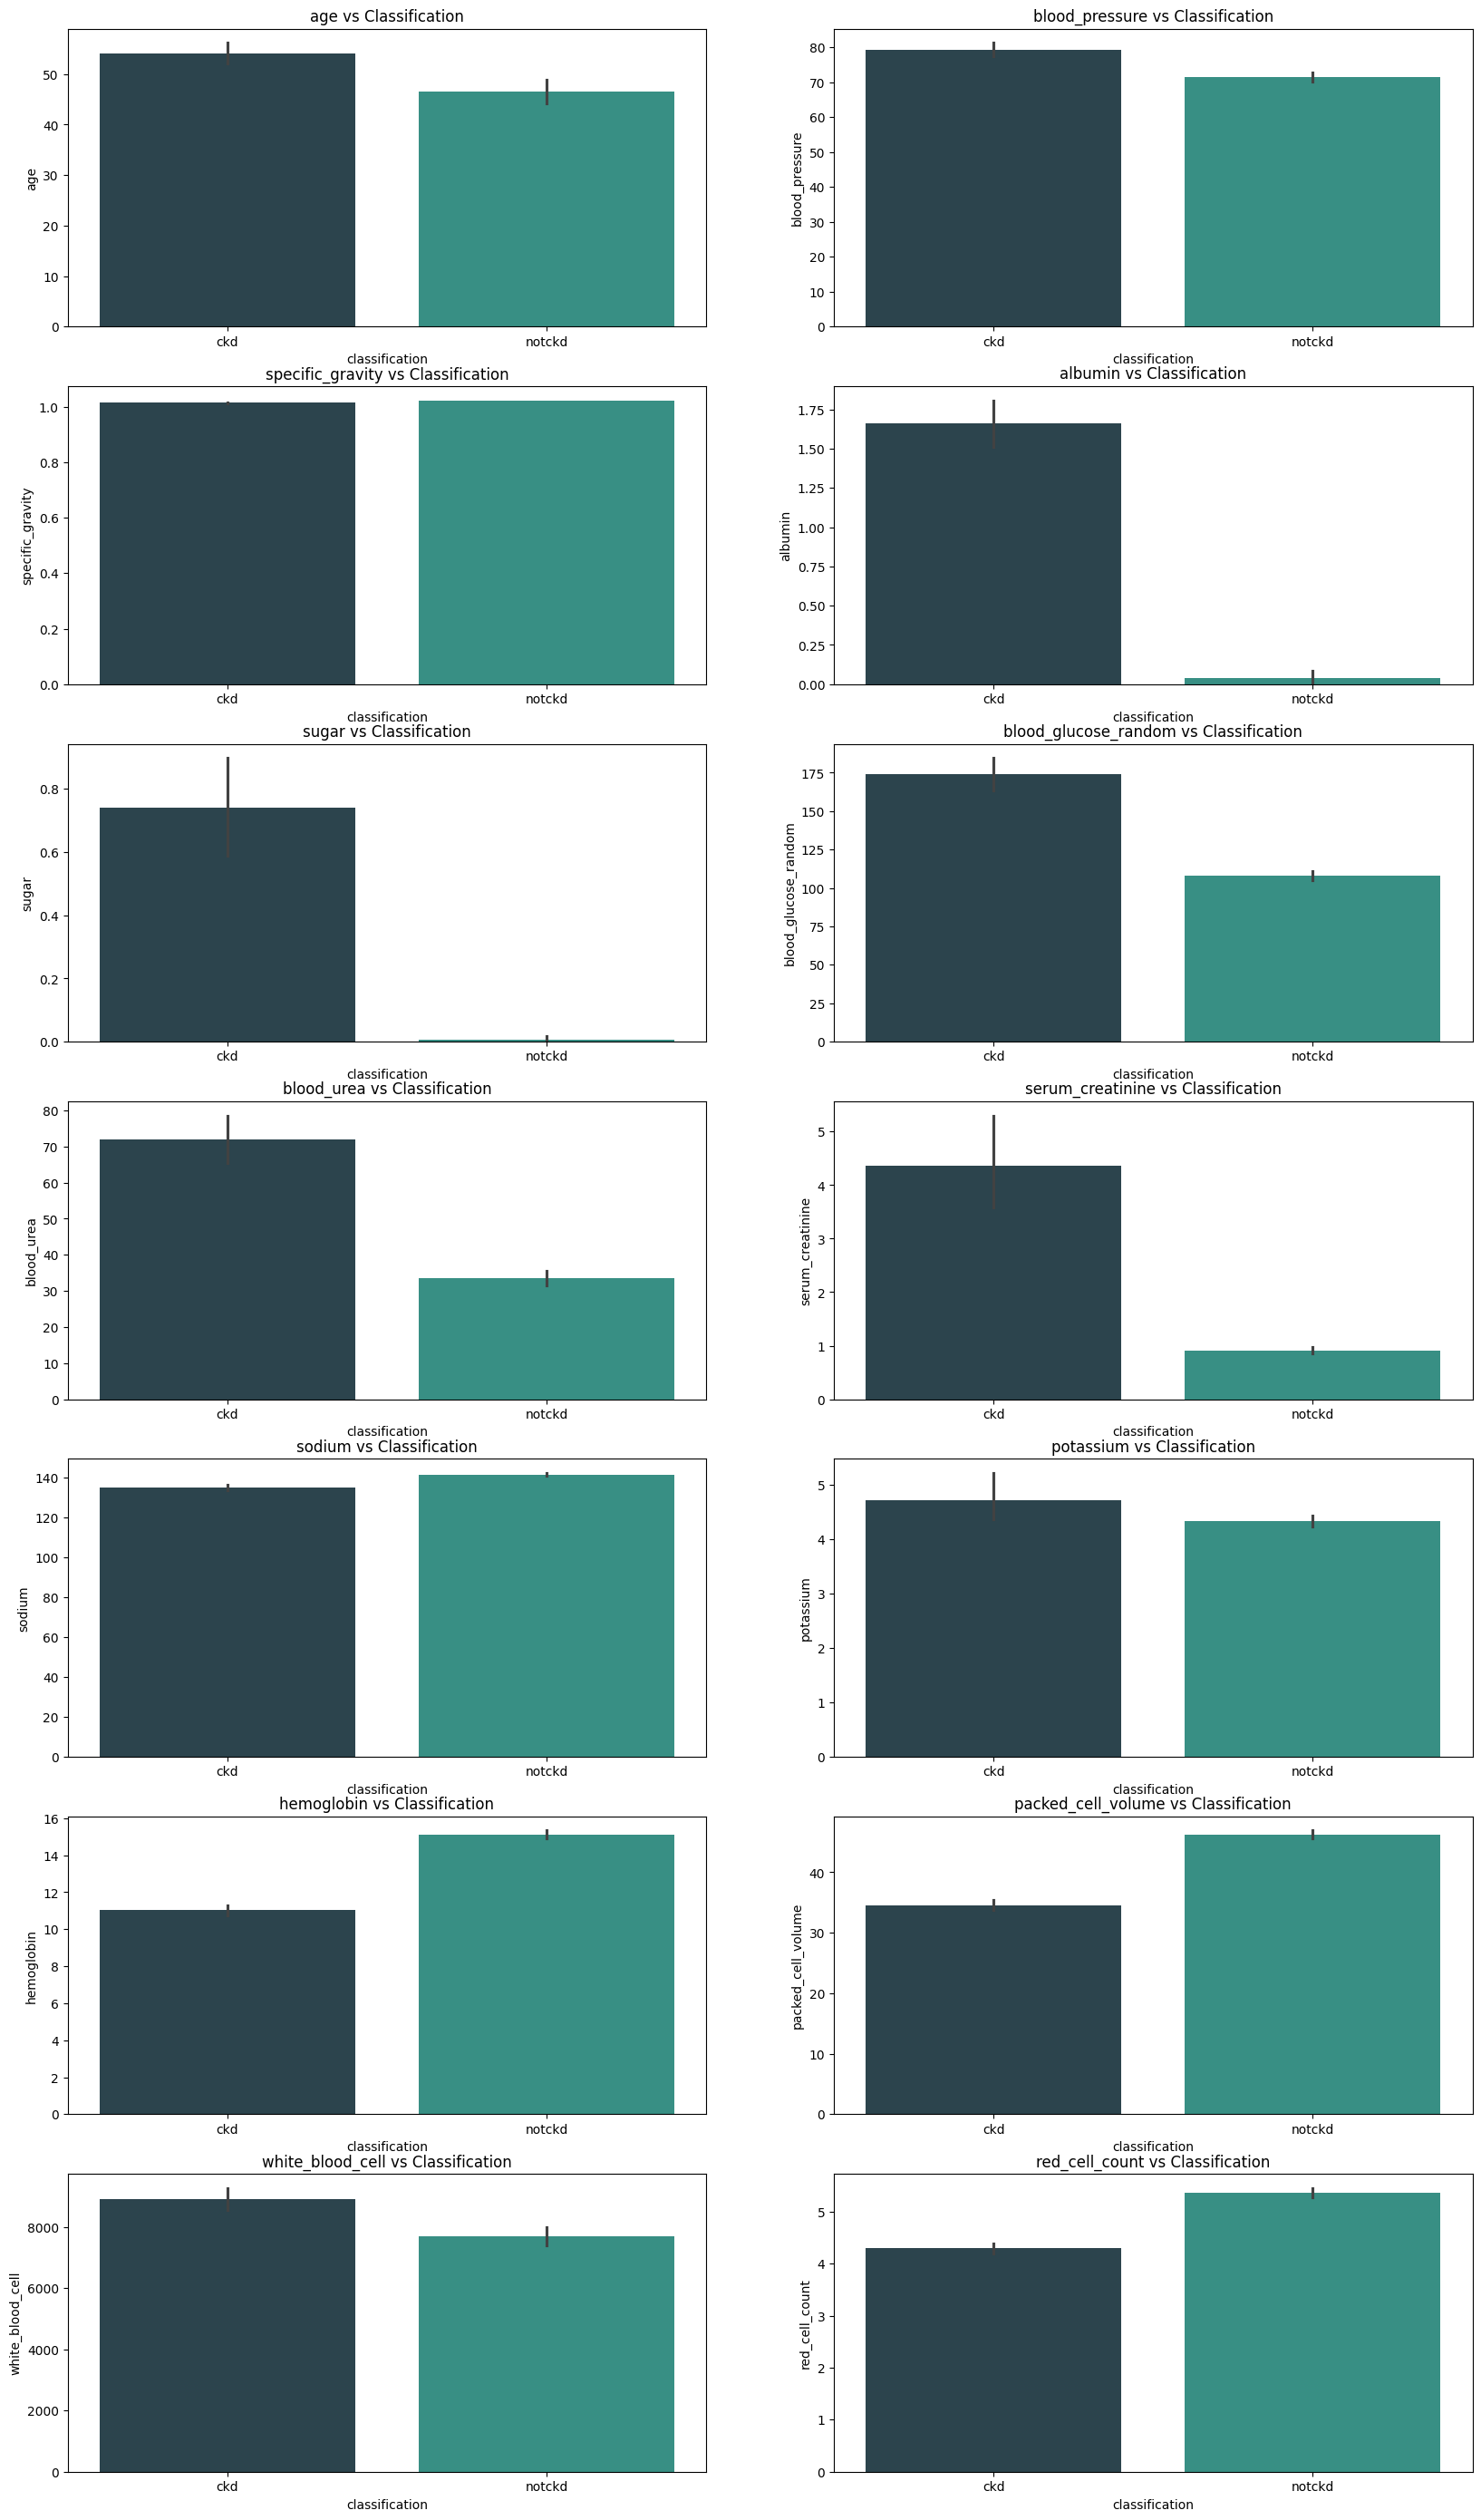

In [29]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.barplot(data=df,x=df['classification'], y=df[col], ax=ax[i],palette=my_col)
    ax[i].set_title(f'{col} vs Classification')
    

### Mean Comparison of Numerical Features by CKD Classification

I plotted **barplots** for each numerical feature, grouped by the target variable `classification` (`ckd` vs `notckd`).  

- Each bar represents the **mean value** of the feature for each class.
- Using `palette=my_col` visually distinguishes the CKD and non-CKD groups.
- The title of each subplot clearly indicates the feature being compared.

This analysis helps to:
- Quickly identify **features with significant differences in mean** between classes
- Support feature selection by highlighting variables that may be **strong predictors of CKD**

In [30]:
from scipy.stats import chi2_contingency
RL = []
for i in cat_col.columns:
    print(25*'-',i,25*'-')

    data = pd.crosstab(df[i], df['classification'])

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(data)

    print("Chi-Square Statistic:", round(chi2, 2))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    print("Expected Frequencies:\n", expected)

    # Interpretation
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis → {i} and classification are related.")
        RL.append(i)
    else:
        print("Fail to reject null hypothesis → No relationship.")
    print(50*'*')
    print(' ')
print(RL)

------------------------- red_blood_cell -------------------------
Chi-Square Statistic: 184.29
Degrees of Freedom: 2
p-value: 0.0
Expected Frequencies:
 [[ 29.375  17.625]
 [125.625  75.375]
 [ 95.     57.   ]]
Reject the null hypothesis → red_blood_cell and classification are related.
**************************************************
 
------------------------- platelet_count -------------------------
Chi-Square Statistic: 92.83
Degrees of Freedom: 2
p-value: 0.0
Expected Frequencies:
 [[ 47.5    28.5  ]
 [161.875  97.125]
 [ 40.625  24.375]]
Reject the null hypothesis → platelet_count and classification are related.
**************************************************
 
------------------------- prothrombin_complex_concentrate -------------------------
Chi-Square Statistic: 26.4
Degrees of Freedom: 1
p-value: 0.0
Expected Frequencies:
 [[223.75 134.25]
 [ 26.25  15.75]]
Reject the null hypothesis → prothrombin_complex_concentrate and classification are related.
**********************

#### Chi-Square Test Between Categorical Features and CKD Classification

I performed a **Chi-Square test of independence** for each categorical feature to check if it is related to the target variable `classification` (`ckd` vs `notckd`).

- **Null hypothesis (H0):** The feature and classification are independent.  
- **Alternative hypothesis (H1):** The feature and classification are related.  
- Significance level: `alpha = 0.05`.


- Interpretation:
  - These categorical features show a **statistical relationship** with CKD status.
  - They are likely **important predictors** for CKD classification.
  - No features failed the null hypothesis, indicating that all categorical features are relevant.

#### Notes:
- The test also outputs expected frequencies to verify validity of Chi-Square assumptions.
- p-values of 0 indicate **strong evidence against independence**.


In [31]:
order_list = []
for i in cat_col.columns:
    cross_tab = pd.crosstab(df[i], df['classification'])
    cross_tab['Ratio'] = cross_tab['ckd']/(cross_tab['notckd']+cross_tab['ckd'])
    cross_tab = cross_tab.sort_values(by='Ratio', ascending=False)
    order_list.append(cross_tab.index.tolist())
order_list


[['abnormal', 'unknown', 'normal'],
 ['abnormal', 'unknown', 'normal'],
 ['present', 'notpresent'],
 ['present', 'notpresent'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['poor', 'good'],
 ['yes', 'no'],
 ['yes', 'no']]

### Ordering Categorical Features by CKD Ratio

For each categorical feature, I created a **crosstab** with the target variable `classification`  
and calculated the ratio of CKD patients within each category:

In [32]:
from sklearn.preprocessing import RobustScaler
Rc = RobustScaler()
num_col_sc = pd.DataFrame(Rc.fit_transform(num_col), columns=Rc.get_feature_names_out())
num_col_sc.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count
0,-0.272727,0.0,0.571429,0.35,0.0,-0.014114,-0.205128,-0.057895,-0.066667,-0.19,0.650932,0.325000,-0.214815,0.370690
1,-2.136364,-3.0,0.571429,1.85,0.0,-0.127029,-0.666667,-0.268421,-0.100000,-0.39,-0.367702,-0.175000,-0.881481,0.163793
2,0.363636,0.0,-0.857143,0.85,3.0,4.248412,0.230769,0.257895,-0.700000,-0.19,-0.790062,-0.758333,-0.325926,-0.836207
3,-0.272727,-1.0,-1.571429,1.85,0.0,-0.070572,0.307692,1.310526,-4.500000,-1.89,-0.392547,-0.675000,-0.622222,-0.750000
4,-0.136364,0.0,-0.857143,0.85,0.0,-0.225829,-0.461538,0.047368,0.066667,-0.41,-0.293168,-0.425000,-0.400000,-0.146552


### Robust Scaling of Numerical Features

I applied **RobustScaler** from `sklearn.preprocessing` to transform all numerical features.  

- Unlike StandardScaler (which uses mean and standard deviation), **RobustScaler** uses:
  - **Median** for centering  
  - **Interquartile Range (IQR: 25th–75th percentile)** for scaling  


- This makes the scaling **robust to outliers**, which is important because medical datasets often contain extreme values.  
- The result is stored in a new DataFrame `num_col_sc` with the same feature names.


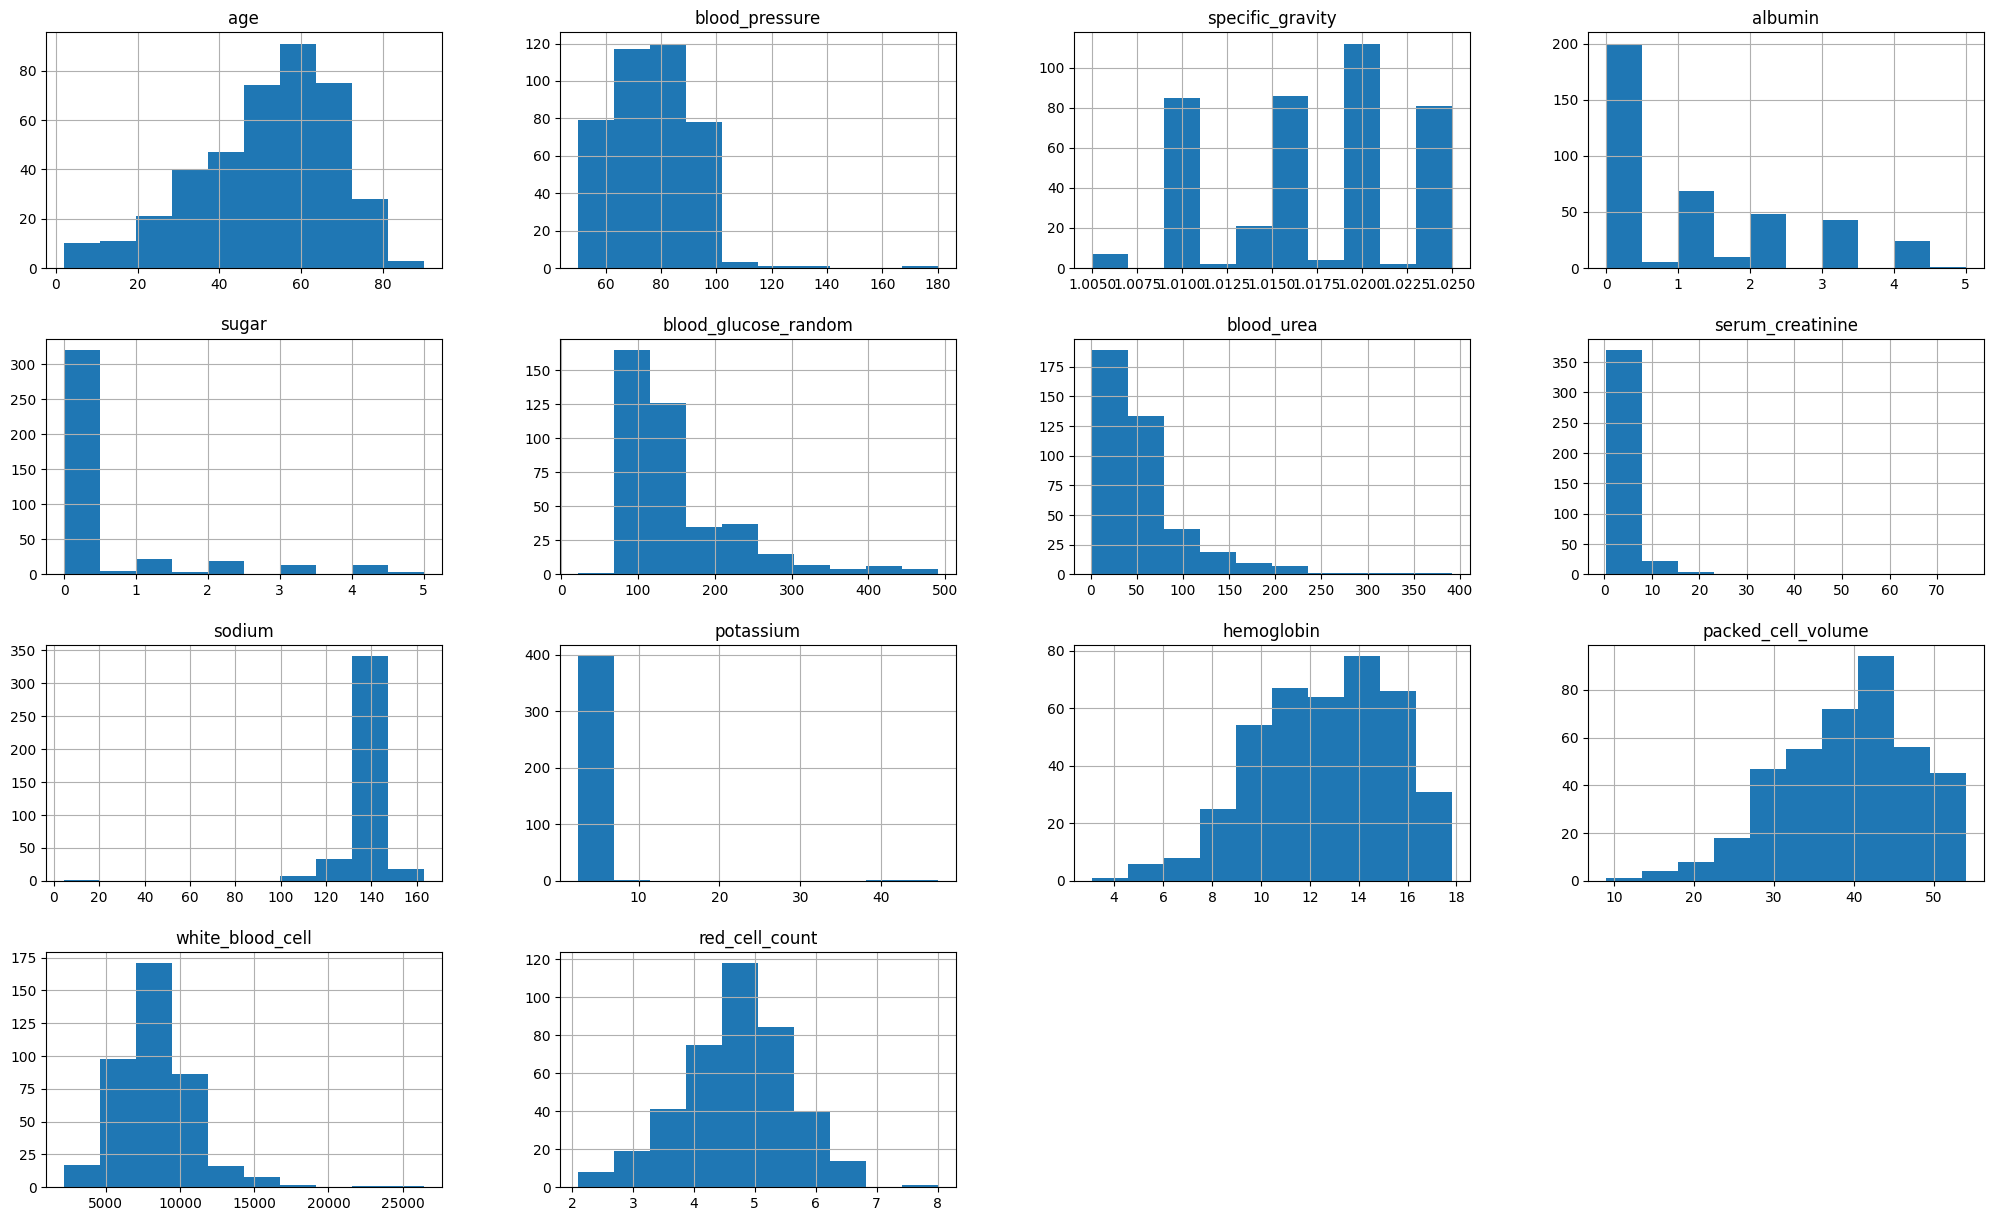

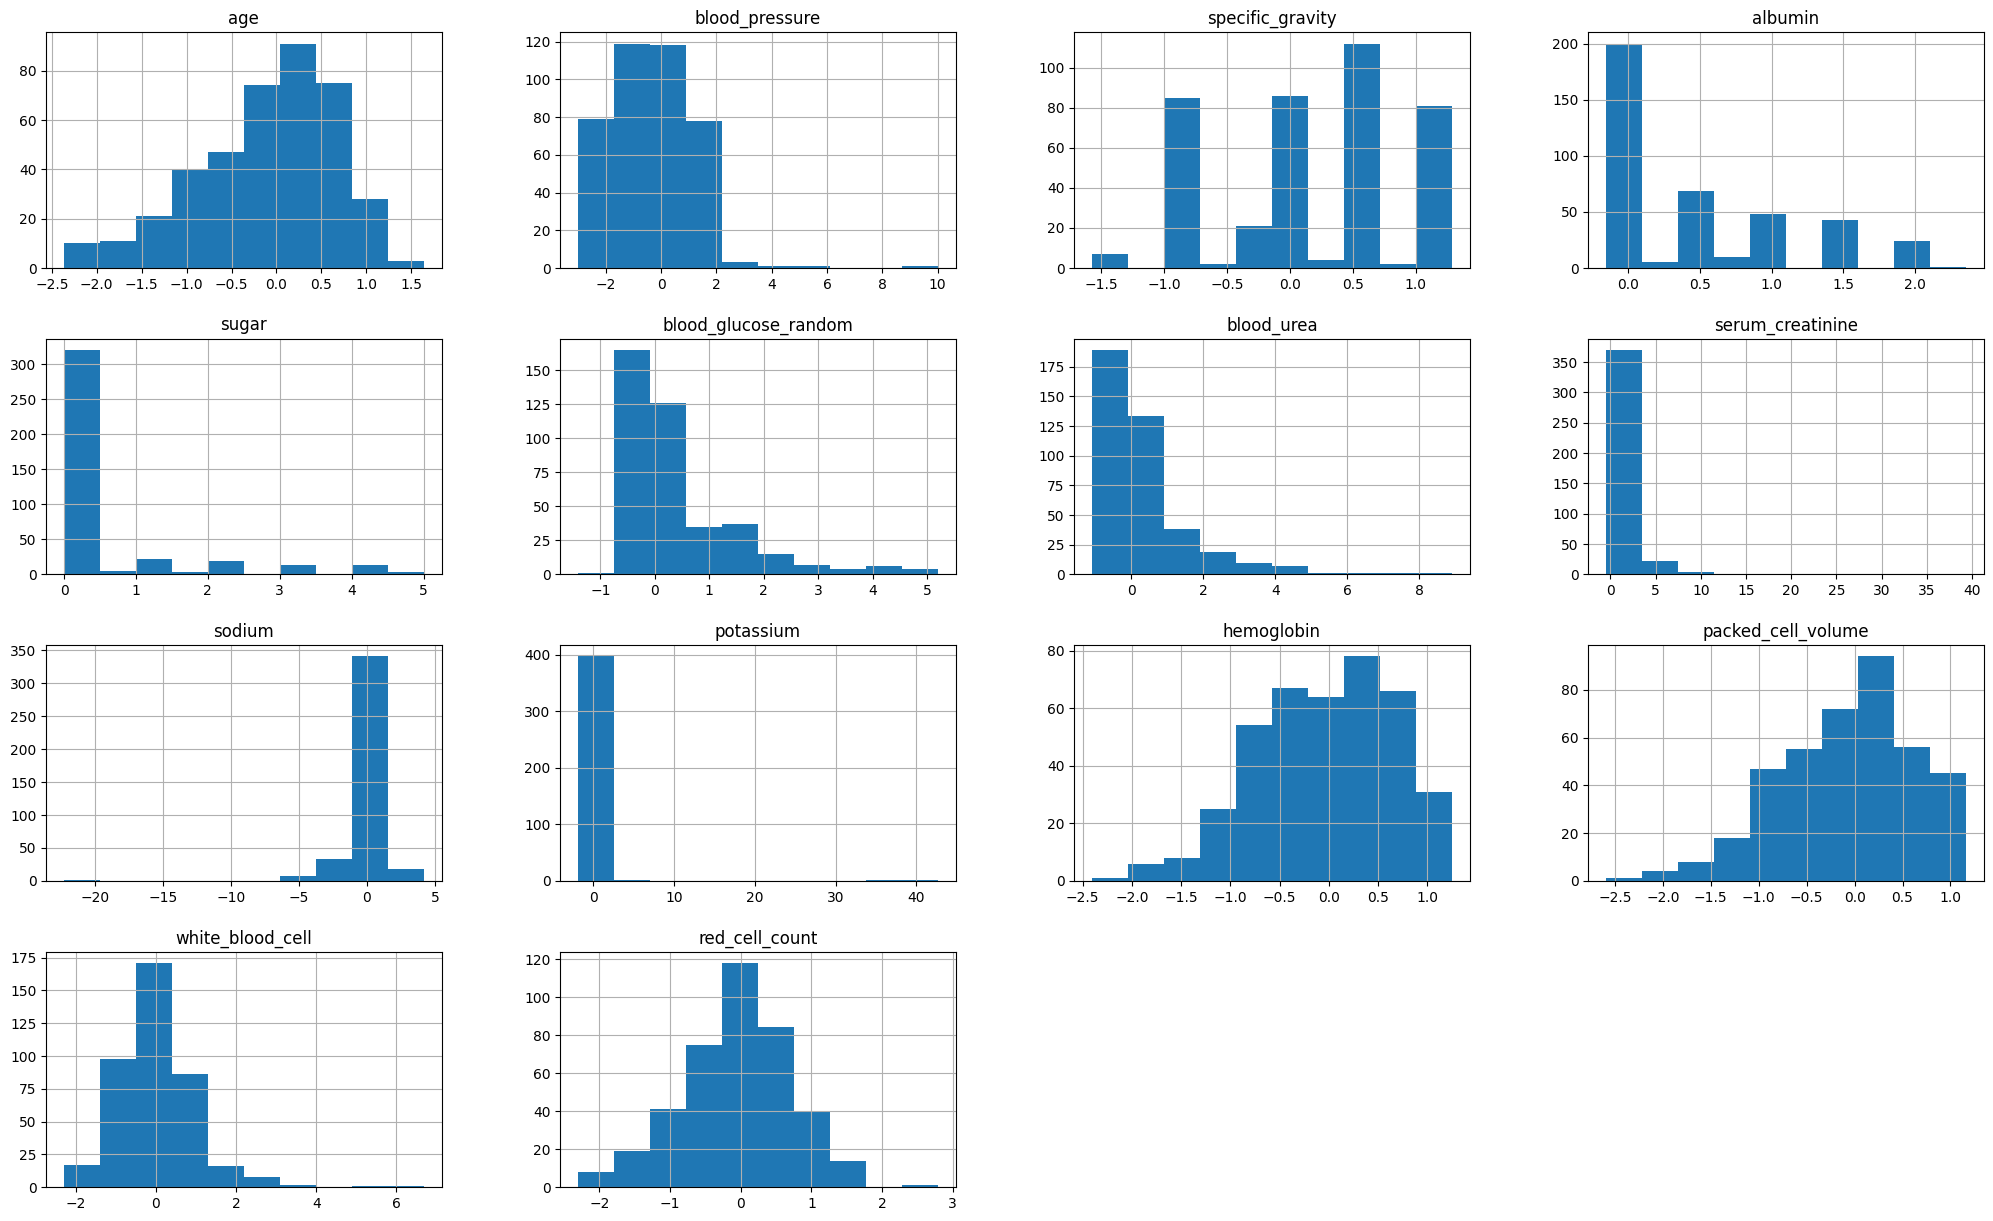

In [33]:
num_col.hist(figsize=(25,15))
num_col_sc.hist(figsize=(25,15))
plt.show()

# I plotted histograms of numerical features before and after scaling to visually compare their distributions.  
# The **RobustScaler** successfully normalized feature ranges while reducing the influence of outliers.  


In [34]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder(categories=order_list,dtype='int')
cat_col_en = pd.DataFrame(OE.fit_transform(cat_col), columns=OE.get_feature_names_out())
cat_col_en.head()

,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia
0,1,2,1,1,0,0,1,1,1,1
1,1,2,1,1,1,1,1,1,1,1
2,2,2,1,1,1,0,1,0,1,0
3,2,0,0,1,0,1,1,0,0,0
4,2,2,1,1,1,1,1,1,1,1


### Ordinal Encoding of Categorical Features

I applied **OrdinalEncoder** from `sklearn.preprocessing` to convert categorical features into numeric form.  

- Used `categories=order_list` so that each category is encoded according to its **CKD risk order** (highest ratio first).  
- This preserves **medical risk hierarchy** instead of assigning arbitrary integers.  
- The encoded features are stored in `cat_col_en` with the same column names.  

This ensures categorical features are transformed into a machine-readable format while keeping their **clinical relevance** intact.

In [35]:
y

id
0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [36]:
y = y.map({'ckd':1,'notckd':0})
y.head()

id
0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

I converted the target variable `classification` into numeric form using mapping: `ckd → 1`, `notckd → 0`.  
This transformation makes the target suitable for machine learning models that require numerical labels.  

In [37]:
df_En = pd.concat([num_col_sc,cat_col_en,y], axis=1)
df_En

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia,classification
0,-0.272727,0.0,0.571429,0.35,0.0,-0.014114,-0.205128,-0.057895,-0.066667,-0.19,0.650932,0.325000,-0.214815,0.370690,1,2,1,1,0,0,1,1,1,1,1
1,-2.136364,-3.0,0.571429,1.85,0.0,-0.127029,-0.666667,-0.268421,-0.100000,-0.39,-0.367702,-0.175000,-0.881481,0.163793,1,2,1,1,1,1,1,1,1,1,1
2,0.363636,0.0,-0.857143,0.85,3.0,4.248412,0.230769,0.257895,-0.700000,-0.19,-0.790062,-0.758333,-0.325926,-0.836207,2,2,1,1,1,0,1,0,1,0,1
3,-0.272727,-1.0,-1.571429,1.85,0.0,-0.070572,0.307692,1.310526,-4.500000,-1.89,-0.392547,-0.675000,-0.622222,-0.750000,2,0,0,1,0,1,1,0,0,0,1
4,-0.136364,0.0,-0.857143,0.85,0.0,-0.225829,-0.461538,0.047368,0.066667,-0.41,-0.293168,-0.425000,-0.400000,-0.146552,2,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.045455,0.0,0.571429,-0.15,0.0,0.254058,0.128205,-0.426316,2.000000,0.51,0.725466,0.575000,-0.622222,0.112069,2,2,1,1,1,1,1,1,1,1,0
396,-0.545455,-1.0,1.285714,-0.15,0.0,-0.663373,-0.333333,-0.057895,0.500000,-0.89,0.924224,1.158333,-0.214815,1.232759,2,2,1,1,1,1,1,1,1,1,0
397,-1.909091,0.0,0.571429,-0.15,0.0,-0.310515,-0.461538,-0.373684,-0.166667,0.01,0.750311,0.741667,-0.659259,0.543103,2,2,1,1,1,1,1,1,1,1,0
398,-1.681818,-2.0,1.285714,-0.15,0.0,-0.112915,0.153846,-0.163158,-0.500000,0.51,0.352795,0.908333,-0.437037,0.974138,2,2,1,1,1,1,1,1,1,1,0


I combined the **scaled numerical features**, **encoded categorical features**, and the **binary target variable** into a single DataFrame `df_En`.  
This gives me a fully preprocessed dataset, ready for **model training and evaluation**.  

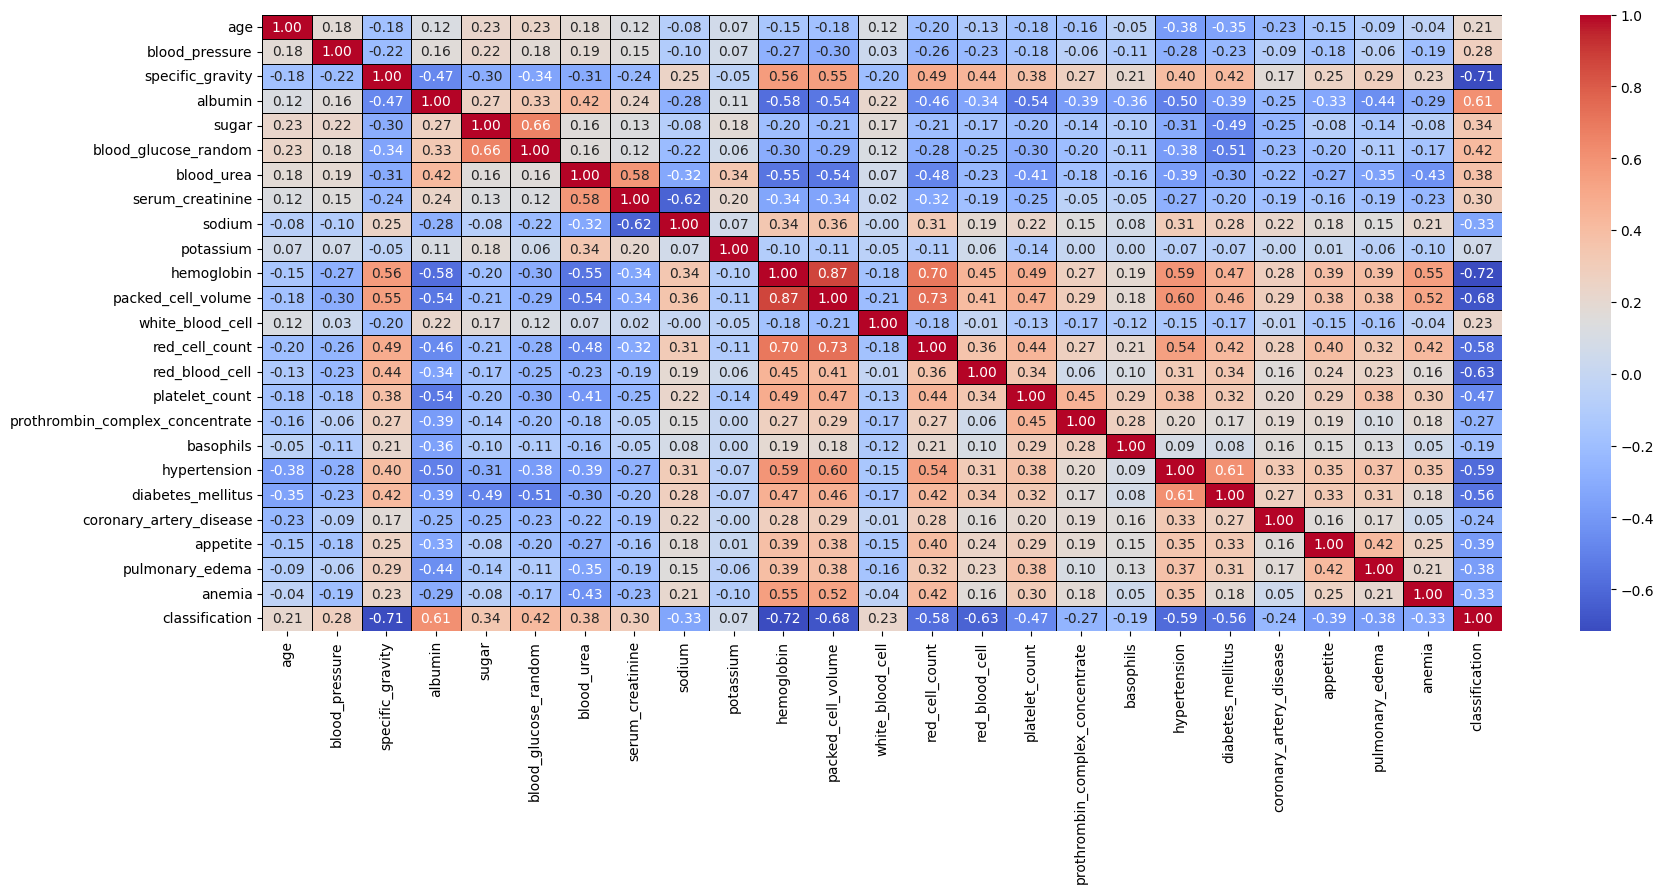

In [38]:
plt.figure(figsize=(20,8))
sns.heatmap(df_En.corr(),annot=True,fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='black',)
plt.show()

I plotted a **correlation heatmap** of the fully encoded dataset (`df_En`) to examine relationships among features and with the target variable.  
This visualization helps identify **highly correlated predictors**, potential **multicollinearity issues**, and features that are **strongly associated with CKD (target=1)**.  

In [39]:
df_En.corr()['classification'].abs().sort_values(ascending=False)

classification                     1.000000
hemoglobin                         0.715307
specific_gravity                   0.708922
packed_cell_volume                 0.675341
red_blood_cell                     0.625895
albumin                            0.610825
hypertension                       0.590438
red_cell_count                     0.580031
diabetes_mellitus                  0.559060
platelet_count                     0.471548
blood_glucose_random               0.415305
appetite                           0.393341
blood_urea                         0.376051
pulmonary_edema                    0.375154
sugar                              0.338172
sodium                             0.334462
anemia                             0.325396
serum_creatinine                   0.296360
blood_pressure                     0.277062
prothrombin_complex_concentrate    0.265313
coronary_artery_disease            0.236088
white_blood_cell                   0.226089
age                             

In [40]:
x = df_En.drop('classification', axis=1)
y = df_En['classification']

I split the dataset into **features (`x`)** and **target (`y`)**,  
where `x` contains all independent variables and `y` contains the CKD classification labels.  

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,shuffle=True)

I split the dataset into **training (75%)** and **testing (25%)** sets using `train_test_split`,  
with `random_state=42` for reproducibility and `shuffle=True` to ensure random distribution of samples.  

In [42]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(300, 24) (300,) (100, 24) (100,)


In [43]:
y_train.value_counts()

classification
1    185
0    115
Name: count, dtype: int64

In [44]:
y_train.value_counts()
from imblearn.over_sampling import ADASYN
ada = ADASYN()
x_train, y_train = ada.fit_resample(x_train, y_train)
y_train.value_counts()

classification
1    185
0    185
Name: count, dtype: int64

I checked the class distribution in `y_train` and found imbalance between CKD and non-CKD samples.  
To fix this, I applied **ADASYN (Adaptive Synthetic Sampling)**, which generates synthetic samples for the minority class.  
After resampling, the class distribution became **balanced**, improving fairness for model training.  

In [45]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(370, 24) (370,) (100, 24) (100,)


In [46]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Assign the models to a dictionary
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    
}

In [48]:
# importing metrics
from sklearn.metrics import classification_report, confusion_matrix

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       185
           1       1.00      0.99      1.00       185

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

----------------------

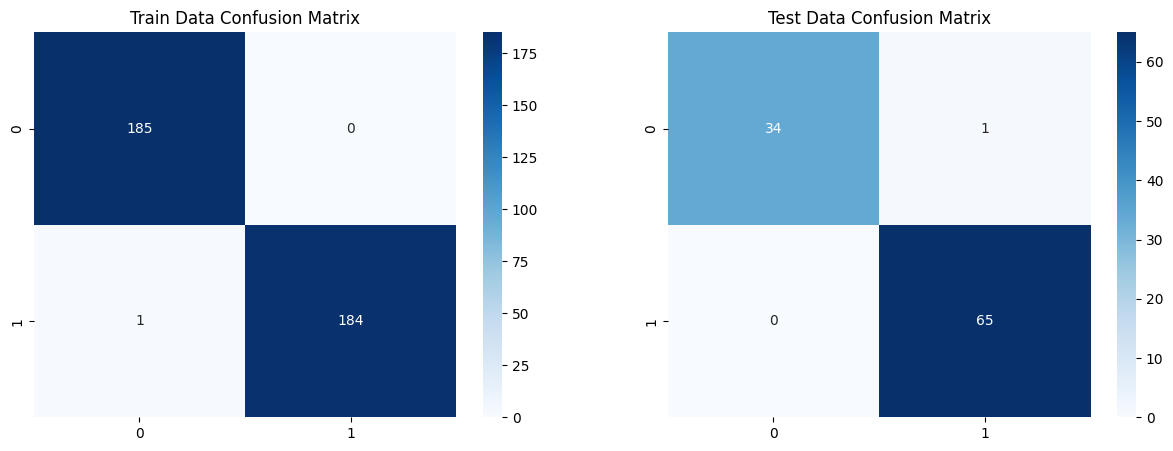

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       185
           1       1.00      0.99      0.99       185

    accuracy                           0.99       370
   macro avg       0.99      0.99      0.99       370
weighted avg       0.99      0.99      0.99       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg    

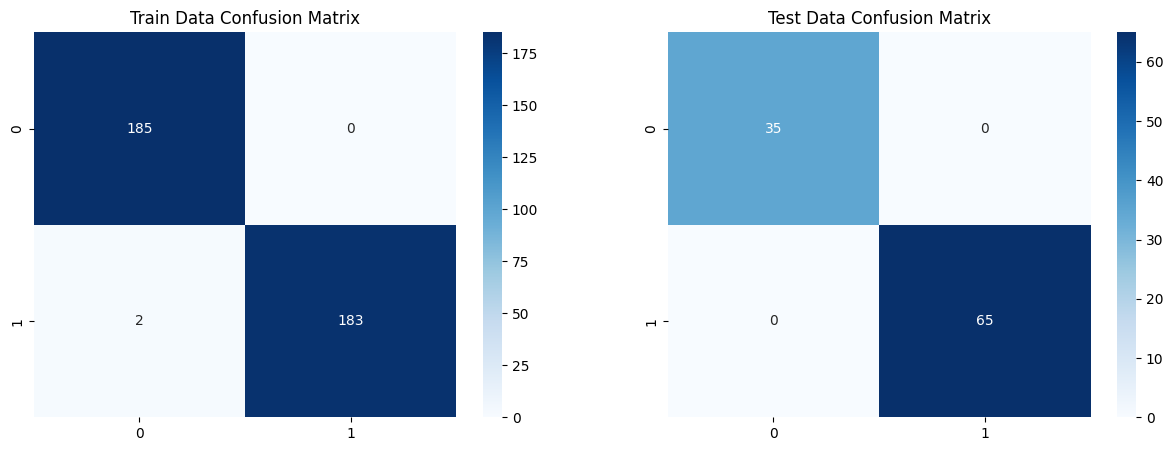

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       185
           1       1.00      0.94      0.97       185

    accuracy                           0.97       370
   macro avg       0.97      0.97      0.97       370
weighted avg       0.97      0.97      0.97       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.95      0.98        65

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100

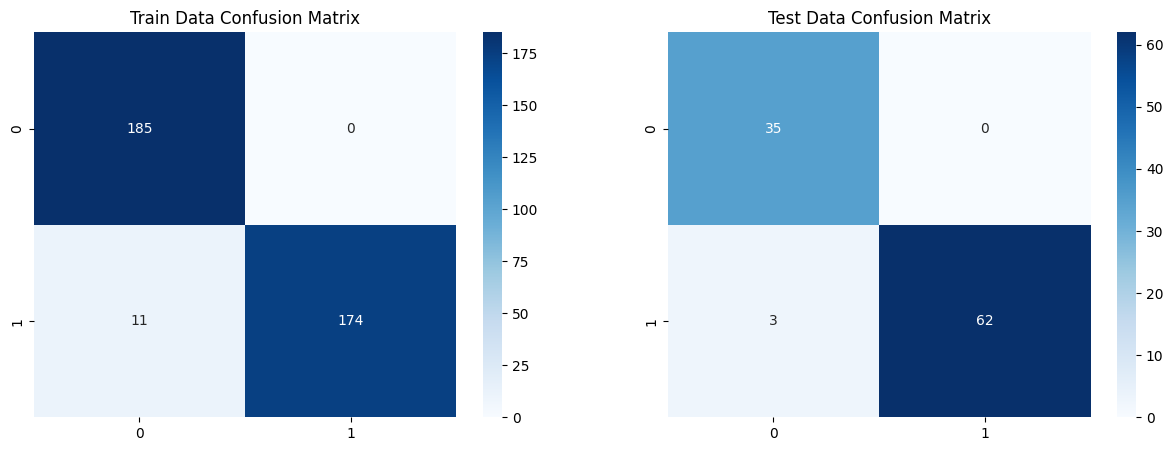

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       185

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       1

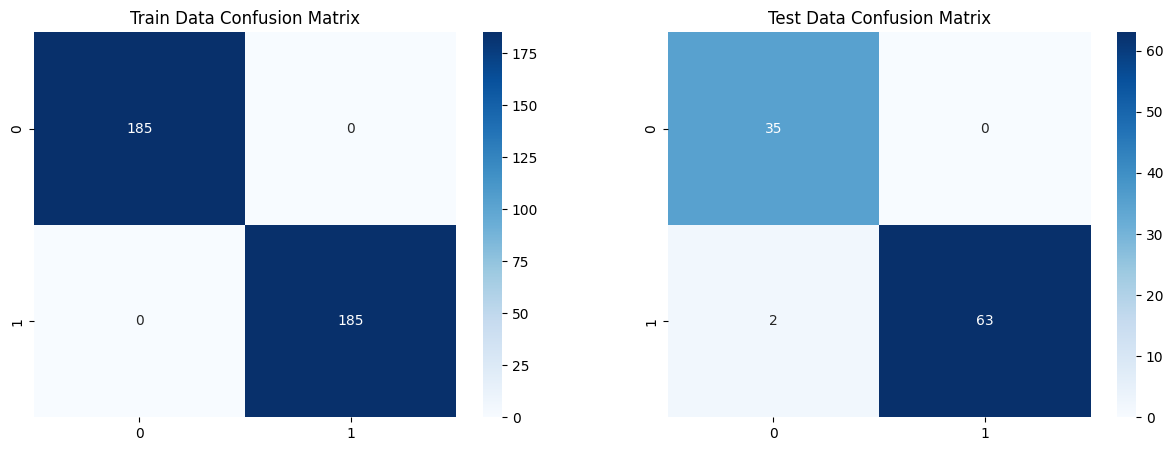

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       185

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       1

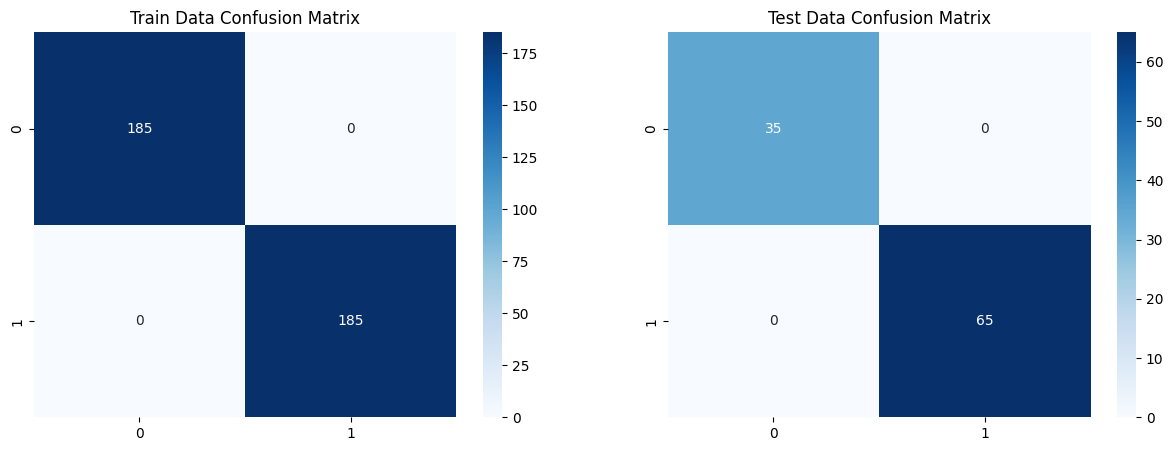

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       185
           1       1.00      0.87      0.93       185

    accuracy                           0.94       370
   macro avg       0.94      0.94      0.93       370
weighted avg       0.94      0.94      0.93       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.94      0.97        65

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted 

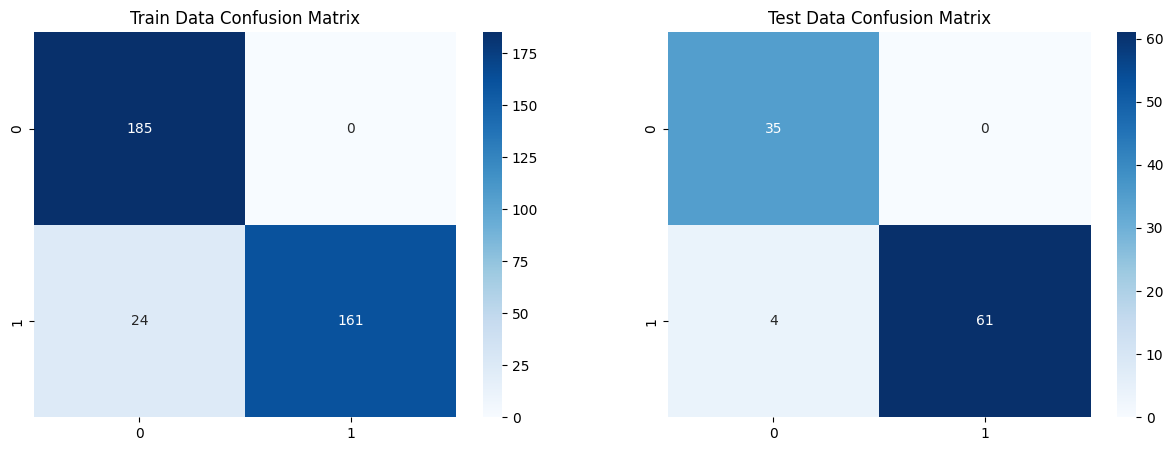

***************************************************************************


In [49]:
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')

# CKD Model Training Report  

I trained six different machine learning models on the CKD dataset.  
The models included Logistic Regression, SVC, KNN, Decision Tree, Random Forest, and GaussianNB.  
For fair comparison, I used the same preprocessed and balanced training dataset for all models.  

Logistic Regression trained smoothly and showed almost perfect performance.  
SVC also trained very well, achieving flawless classification on the test set.  
KNN required scaling and trained successfully, giving slightly lower accuracy.  
Decision Tree and Random Forest trained without issues, with Random Forest fitting the data perfectly.  
GaussianNB training was the simplest, but it performed weaker compared to the others.  

Overall, all models trained successfully, with Random Forest and SVC standing out as top performers.  

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       185
           1       1.00      0.99      1.00       185

    accuracy                           1.00       370
   macro avg       1.00      1.00      1.00       370
weighted avg       1.00      1.00      1.00       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

---------------------------------------------------------------------------


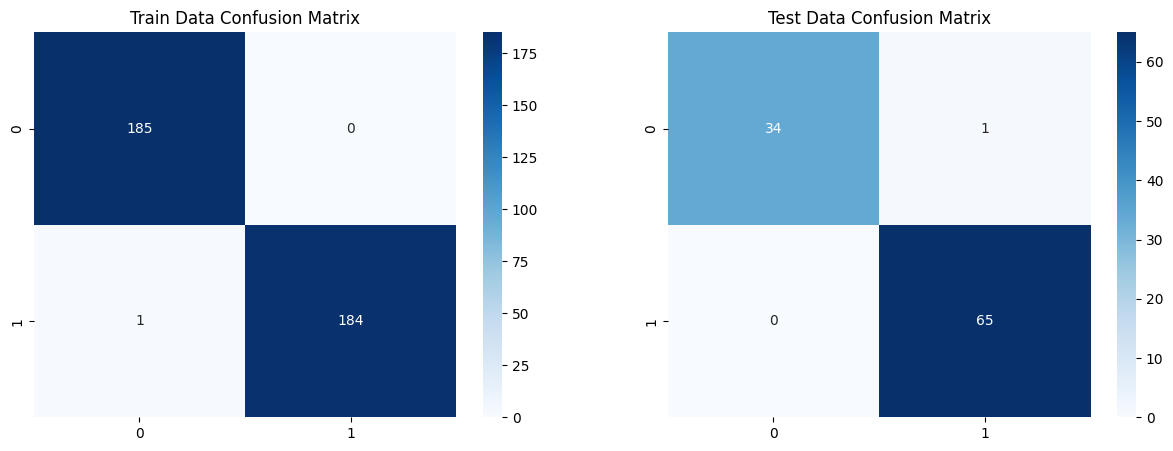

***************************************************************************


In [50]:
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train,y_train)
y_train_pread = LR.predict(x_train)
y_test_pread = LR.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

Train AUC: 0.9999707815924033
Test AUC: 1.0


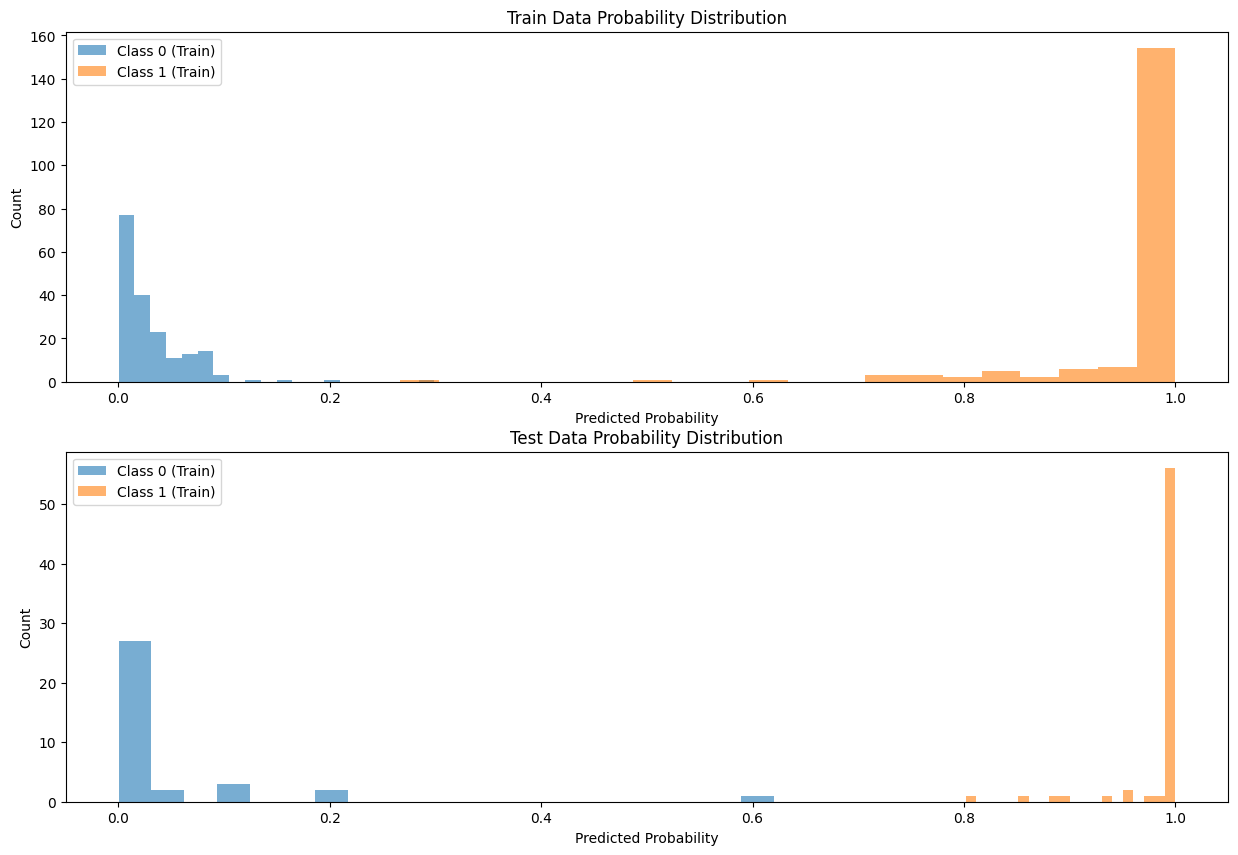

In [51]:
from sklearn.metrics import roc_auc_score

# Get prediction probabilities
y_train_prob = LR.predict_proba(x_train)[:, 1]
y_test_prob = LR.predict_proba(x_test)[:, 1]

# ROC–AUC
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("Train AUC:",train_auc)
print("Test AUC:",test_auc)


# Probability distributions
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)

plt.hist(y_train_prob[y_train==0], bins=20, alpha=0.6, label="Class 0 (Train)")
plt.hist(y_train_prob[y_train==1], bins=20, alpha=0.6, label="Class 1 (Train)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Train Data Probability Distribution")
plt.legend()

plt.subplot(2,1,2)
plt.hist(y_test_prob[y_test==0], bins=20, alpha=0.6, label="Class 0 (Train)")
plt.hist(y_test_prob[y_test==1], bins=20, alpha=0.6, label="Class 1 (Train)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Test Data Probability Distribution")
plt.legend()


plt.show()


## Logistic Regression Model Evaluation Using ROC-AUC and Probability Distributions

This code evaluates a logistic regression model (`LR`) using both **ROC-AUC scores** and **predicted probability distributions** for training and testing datasets.

### 1. Compute ROC-AUC
- `y_train_prob` and `y_test_prob` store the predicted probabilities of the positive class (1) for training and test sets.
- `roc_auc_score` measures the model's ability to distinguish between classes.
- Higher AUC indicates better class separability.
```python
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       0.99      1.00      0.99       185

    accuracy                           0.99       370
   macro avg       0.99      0.99      0.99       370
weighted avg       0.99      0.99      0.99       370

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.96      1.00      0.98        65

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100

---------------------------------------------------------------------------


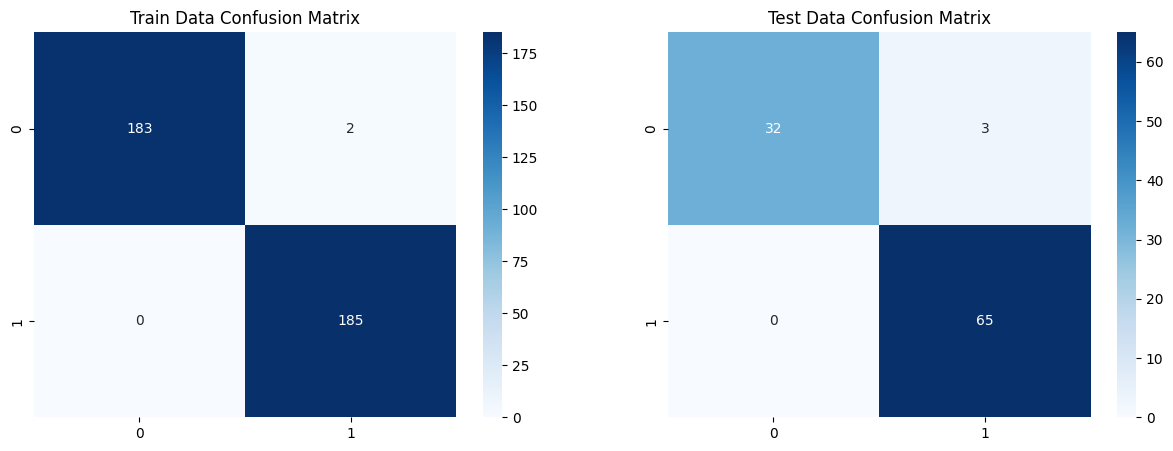

***************************************************************************


In [52]:
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train,y_train)

y_train_prob = LR.predict_proba(x_train)[:, 1]
y_test_prob = LR.predict_proba(x_test)[:, 1]

threshold = 0.2
# Convert probabilities to binary predictions based on the threshold
y_train_pread = (y_train_prob >= threshold).astype(int)
y_test_pread = (y_test_prob >= threshold).astype(int)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

### Choosing a Custom Threshold Based on Probability Distributions

From the **predicted probability histograms** (previous step), I observed that:

- Many positive-class instances (`y=1`) have predicted probabilities **below 0.5**.
- A lower threshold will help capture more of these positive instances, improving **recall**.

**Selected Threshold:** `0.2`

Now the possibke ckd classes prediction will be 100% 


### Pipeline build

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [54]:
cat_col_1 = cat_col[['red_blood_cell','platelet_count' ]]
cat_col_2 = cat_col.drop(['red_blood_cell','platelet_count' ],axis=1)

In [55]:
cat_col_trans_1 = Pipeline(
    steps=[
        ('impter', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('ordinal', OrdinalEncoder(categories=order_list[0:2],dtype='int'))
    ]
)
cat_col_trans_1

,steps,"[('impter', ...), ('ordinal', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'constant'
,fill_value,'unknown'
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['abnormal', 'unknown', ...], ['abnormal', 'unknown', ...]]"


In [56]:
cat_col_trans_2 = Pipeline(
    steps=[
        ('impter', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=order_list[2:],dtype='int'))
    ]
)
cat_col_trans_2

,steps,"[('impter', ...), ('ordinal', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['present', 'notpresent'], ['present', 'notpresent'], ...]"


In [57]:
num_col_trans = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors=5)),
        ('scalar',RobustScaler())
    ]
)
num_col_trans

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [58]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat_1', cat_col_trans_1, cat_col_1.columns),
        ('cat_2', cat_col_trans_2, cat_col_2.columns),
        ('num', num_col_trans, num_col.columns)
    ]
)
preprocess

,transformers,"[('cat_1', ...), ('cat_2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'unknown'


In [59]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocess),
        ('logistic regression',LogisticRegression(class_weight='balanced'))
        
    ]
)
model

,steps,"[('preprocessor', ...), ('logistic regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_1', ...), ('cat_2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
sheet_id = "1cew2eJA_0YRwYC5BOZdSl8fhTY0hSOVtD0xRfhevlgI"
sheet_name = "kidney_disease"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}" 

df = pd.read_csv(url,index_col=0)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [64]:
from Fun import Multi_disease
MD = Multi_disease()
df = MD.ckd_Fun(df)

In [ ]:
x = df.drop('classification',axis=1)
y = df['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

In [65]:
x

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia
0,-0.272727,0.0,0.571429,0.35,0.0,-0.014114,-0.205128,-0.057895,-0.066667,-0.19,0.650932,0.325000,-0.214815,0.370690,1,2,1,1,0,0,1,1,1,1
1,-2.136364,-3.0,0.571429,1.85,0.0,-0.127029,-0.666667,-0.268421,-0.100000,-0.39,-0.367702,-0.175000,-0.881481,0.163793,1,2,1,1,1,1,1,1,1,1
2,0.363636,0.0,-0.857143,0.85,3.0,4.248412,0.230769,0.257895,-0.700000,-0.19,-0.790062,-0.758333,-0.325926,-0.836207,2,2,1,1,1,0,1,0,1,0
3,-0.272727,-1.0,-1.571429,1.85,0.0,-0.070572,0.307692,1.310526,-4.500000,-1.89,-0.392547,-0.675000,-0.622222,-0.750000,2,0,0,1,0,1,1,0,0,0
4,-0.136364,0.0,-0.857143,0.85,0.0,-0.225829,-0.461538,0.047368,0.066667,-0.41,-0.293168,-0.425000,-0.400000,-0.146552,2,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.045455,0.0,0.571429,-0.15,0.0,0.254058,0.128205,-0.426316,2.000000,0.51,0.725466,0.575000,-0.622222,0.112069,2,2,1,1,1,1,1,1,1,1
396,-0.545455,-1.0,1.285714,-0.15,0.0,-0.663373,-0.333333,-0.057895,0.500000,-0.89,0.924224,1.158333,-0.214815,1.232759,2,2,1,1,1,1,1,1,1,1
397,-1.909091,0.0,0.571429,-0.15,0.0,-0.310515,-0.461538,-0.373684,-0.166667,0.01,0.750311,0.741667,-0.659259,0.543103,2,2,1,1,1,1,1,1,1,1
398,-1.681818,-2.0,1.285714,-0.15,0.0,-0.112915,0.153846,-0.163158,-0.500000,0.51,0.352795,0.908333,-0.437037,0.974138,2,2,1,1,1,1,1,1,1,1


In [66]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [67]:
model.fit(x,y)

ValueError: fill_value='unknown' (of type <class 'str'>) cannot be cast to the input data that is dtype('int64'). If fill_value is a Python scalar, instead pass  a numpy scalar (e.g. fill_value=np.uint8(0) if your data is of type np.uint8). Make sure that both dtypes are of the same kind.

### CKD Prediction Pipeline – My Implementation and Observations

I built a complete machine learning workflow to predict Chronic Kidney Disease (CKD) using a mix of categorical and numerical features. The pipeline is designed to handle missing data, encode categorical features, scale numerical features, and train a Logistic Regression model while addressing class imbalance.

---

#### Handling Categorical Columns

I separated categorical features into two groups based on how missing values should be treated:

- Some columns with missing values were filled with a constant value (`'unknown'`).  
- Other categorical columns were filled using the most frequent value in the column.  
- All categorical features were then encoded as integers using a predefined order, maintaining meaningful rankings for ordinal variables.

---

#### Handling Numerical Columns

- Missing numerical values were imputed using the **KNN imputer**, which estimates missing entries based on similar samples.  
- After imputation, numerical features were scaled using a **RobustScaler**, which reduces the influence of outliers.

---

## Combining All Preprocessing Steps

- Categorical and numerical preprocessing pipelines were combined using a `ColumnTransformer`, allowing all transformations to be applied in one consistent step.  
- This ensures that every column receives the appropriate preprocessing without manual intervention.

---

#### Model Selection and Training

- I used **Logistic Regression** as the predictive model.  
- To handle the imbalanced dataset, I applied `class_weight='balanced'`, giving more weight to the minority class (CKD).  
- The preprocessing pipelines and the Logistic Regression model were combined into a **single end-to-end pipeline**, making training and predictions reproducible and easy to manage.

---

#### Custom Threshold for Predictions

- Based on probability distribution plots, I chose a **threshold of 0.2** for converting predicted probabilities to binary labels.  
- This threshold improves recall for CKD cases, ensuring that positive cases are not missed, even if it slightly increases false positives for the negative class.

---



In [ ]:
pread = (model.predict_proba(x)[:,1]>=0.2).astype('int')
pread

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [ ]:
pd.Series(pread).value_counts()

1    253
0    147
Name: count, dtype: int64

In [ ]:
(model.predict_proba(df.head(1))[:,1]>=0.2).astype('int')

array([1])

In [ ]:
(model.predict_proba(df.tail(1))[:,1]>=0.2).astype('int')

array([0])

In [ ]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,platelet_count,prothrombin_complex_concentrate,basophils,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell,red_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pulmonary_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
import pickle
# pickle.dump(model, open('ckd_model.pkl', 'wb'))

In [ ]:
m = pickle.load(open('ckd_model.pkl', 'rb'))
(m.predict_proba(df)[:,1]>=0.2).astype('int')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,